In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
from sklearn.impute import KNNImputer

In [2]:
data=pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [4]:
data.shape

(3376, 46)

In [5]:
data.head(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType                 PropertyName          Address     City State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  TotalGHGEmissions  GHGEmissionsIntensity
0              1      2016  NonResidential               Hotel         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0                    0659000030                    7     DOWNTOWN  47.61220 -122.33799       1927                1.0              12             88434                   0                   88434                          Hotel                  Hotel                    88434.0                          NaN                              NaN                         NaN                             NaN                      NaN             60.0         81.699997           84.300003          182.500000            189.000000            7226362.5              7456910.0      2003882.00      1.156514e+06          3946027.0         12764.52930         1276453.0        False       NaN        Compliant     NaN             249.98                   2.83
1              2      2016  NonResidential               Hotel              Paramount Hotel  724 Pine street  Seattle    WA  98101.0                    0659000220                    7     DOWNTOWN  47.61317 -122.33393       1996                1.0              11            103566               15064                   88502     Hotel, Parking, Restaurant                  Hotel                    83880.0                      Parking                          15064.0                  Restaurant                          4622.0                      NaN             61.0         94.800003           97.900002          176.100006            179.399994            8387933.0              8664479.0            0.00      9.504252e+05          3242851.0         51450.81641         5145082.0        False       NaN        Compliant     NaN             295.86                   2.86
2              3      2016  NonResidential               Hotel      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0                    0659000475                    7     DOWNTOWN  47.61393 -122.33810       1969                1.0              41            956110              196718                  759392                          Hotel                  Hotel                   756493.0                          NaN                              NaN                         NaN                             NaN                      NaN             43.0         96.000000           97.699997          241.899994            244.100006           72587024.0             73937112.0     21566554.00      1.451544e+07         49526664.0         14938.00000         1493800.0        False       NaN        Compliant     NaN            2089.28                   2.19
3              5      2016  NonResidential               Hotel                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0                    0659000640                    7     DOWNTOWN  47.61412 -122.33664       1926                1.0              10             61320                   0                   61320                          Hotel                  Hotel                    61320.0                          NaN                              NaN                         NaN   

In [6]:
data.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode     Latitude    Longitude    YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  Comments  TotalGHGEmissions  GHGEmissionsIntensity
count    3376.000000    3376.0   3360.000000          3376.000000  3376.000000  3376.000000  3376.000000        3368.000000     3376.000000      3.376000e+03         3376.000000            3.376000e+03               3.356000e+03                      1679.000000                      596.000000      2533.000000       3369.000000         3370.000000         3367.000000           3367.000000         3.371000e+03           3.370000e+03    3.367000e+03      3.367000e+03       3.367000e+03        3.367000e+03      3.367000e+03       0.0        3367.000000            3367.000000
mean    21208.991114    2016.0  98116.949107             4.439277    47.624033  -122.334795  1968.573164           1.106888        4.709123      9.483354e+04         8001.526066            8.683201e+04               7.917764e+04                     28444.075817                    11738.675166        67.918674         54.732116           57.033798          134.232848            137.783932         5.403667e+06           5.276726e+06    2.745959e+05      1.086639e+06       3.707612e+06        1.368505e+04      1.368505e+06       NaN         119.723971               1.175916
std     12223.757015       0.0     18.615205             2.120625     0.047758     0.027203    33.088156           2.108402        5.494465      2.188376e+05        32326.723928            2.079398e+05               2.017034e+05                     54392.917928                    29331.199286        26.873271         56.273124           57.163330          139.287554            139.109807         2.161063e+07           1.593879e+07    3.912173e+06      4.352478e+06       1.485066e+07        6.709781e+04      6.709781e+06       NaN         538.832227               1.821452
min         1.000000    2016.0  98006.000000             1.000000    47.499170  -122.414250  1900.000000           0.000000        0.000000      1.128500e+04            0.000000            3.636000e+03               5.656000e+03                         0.000000                        0.000000         1.000000          0.000000            0.000000            0.000000             -2.100000         0.000000e+00           0.000000e+00    0.000000e+00     -3.382680e+04      -1.154170e+05        0.000000e+00      0.000000e+00       NaN          -0.800000              -0.020000
25%     19990.750000    2016.0  98105.000000             3.000000    47.599860  -122.350662  1948.000000           1.000000        2.000000      2.848700e+04            0.000000            2.775600e+04               2.509475e+04                      5000.000000                     2239.000000        53.000000         27.900000           29.400000           74.699997             78.400002         9.251286e+05           9.701822e+05    0.000000e+00      1.874229e+05       6.394870e+05        0.000000e+00      0.000000e+00       NaN           9.495000               0.210000
50%     23112.000000    2016.0  98115.000000             4.000000    47.618675  -122.332495  1975.000000           1.000000        4.000000      4.417500e+04            0.000000            4.321600e+04               3.989400e+04                     10664.000000                     5043.000000        75.000000         38.599998           40.900002           96.199997            101.099998         1.803753e+06           1.904452e+06    0.000000e+00      3.451299e+05       1.177583e+06        3.237538e+03      3.237540e+05       NaN    

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

# Nettoyage jeu de données

## Réduction variables et individus

### Suppression variables redondantes et inutiles

In [8]:
data.Comments.unique()

array([nan])

In [9]:
data.City.unique()

array(['Seattle'], dtype=object)

In [10]:
data.drop('City',axis=1,inplace=True)

In [11]:
data.State.unique()

array(['WA'], dtype=object)

In [12]:
data.drop('State',axis=1,inplace=True)

In [13]:
data.DataYear.unique()

array([2016], dtype=int64)

In [14]:
data.drop('DataYear',axis=1,inplace=True)

In [15]:
subset=['ZipCode',
        'PropertyName',
        'CouncilDistrictCode',
        'Comments',
        'TaxParcelIdentificationNumber',
        'Outlier',
        'Electricity(kWh)',
        'NaturalGas(therms)',
        'GHGEmissionsIntensity',
        'Address',
        'YearsENERGYSTARCertified',
        'SiteEUI(kBtu/sf)',
        'SourceEUI(kBtu/sf)',
        'SiteEnergyUseWN(kBtu)',
        'SourceEUIWN(kBtu/sf)',
        'SiteEUIWN(kBtu/sf)',
        'DefaultData'
       ]

In [16]:
data.drop(subset,axis=1,inplace=True)

In [17]:
data

OSEBuildingID        BuildingType PrimaryPropertyType           Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)                          ListOfAllPropertyUseTypes LargestPropertyUseType  LargestPropertyUseTypeGFA    SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)              ComplianceStatus  TotalGHGEmissions
0                 1      NonResidential               Hotel               DOWNTOWN  47.61220 -122.33799       1927                1.0              12             88434                   0                   88434                                              Hotel                  Hotel                    88434.0                             NaN                              NaN                         NaN                             NaN             60.0         7.226362e+06      2003882.00       3.946027e+06      1.276453e+06                     Compliant             249.98
1                 2      NonResidential               Hotel               DOWNTOWN  47.61317 -122.33393       1996                1.0              11            103566               15064                   88502                         Hotel, Parking, Restaurant                  Hotel                    83880.0                         Parking                          15064.0                  Restaurant                          4622.0             61.0         8.387933e+06            0.00       3.242851e+06      5.145082e+06                     Compliant             295.86
2                 3      NonResidential               Hotel               DOWNTOWN  47.61393 -122.33810       1969                1.0              41            956110              196718                  759392                                              Hotel                  Hotel                   756493.0                             NaN                              NaN                         NaN                             NaN             43.0         7.258702e+07     21566554.00       4.952666e+07      1.493800e+06                     Compliant            2089.28
3                 5      NonResidential               Hotel               DOWNTOWN  47.61412 -122.33664       1926                1.0              10             61320                   0                   61320                                              Hotel                  Hotel                    61320.0                             NaN                              NaN                         NaN                             NaN             56.0         6.794584e+06      2214446.25       2.768924e+06      1.811213e+06                     Compliant             286.43
4                 8      NonResidential               Hotel               DOWNTOWN  47.61375 -122.34047       1980                1.0              18            175580               62000                  113580                      Hotel, Parking, Swimming Pool                  Hotel                   123445.0                         Parking                          68009.0               Swimming Pool                             0.0             75.0         1.417261e+07            0.00       5.368607e+06      8.803998e+06                     Compliant             505.01
...             ...                 ...                 ...                    ...       ...        ...        ...                ...             ...               ...                 ...                     ...                                                ...                    ...                        ...                             ...                              ...                         ...                             ...              ...                  ...             ...                ...               ...          

### Suppression lignes inutiles

In [18]:
data.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [19]:
subset=['Multifamily MR (5-9)','Multifamily LR (1-4)','Multifamily HR (10+)']
for var in subset:
    data=data[data.BuildingType!=var]

In [20]:
data.shape

(1668, 26)

In [21]:
data['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', nan, 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing

In [22]:
cnt=0
for cat in ['Other - Lodging/Residential','Multifamily Housing','Residence Hall/Dormitory','Senior Care Community']:
    idx=data.index[data['LargestPropertyUseType']==cat]
    cnt+=len(idx)
    data.drop(idx,axis=0,inplace=True)
print("Nombre totale lignes supprimées {0:3d}".format(cnt))

Nombre totale lignes supprimées  59


In [23]:
data['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient', nan,
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Other - Recreation', 'Lifestyle Center',
       'Other - Public Services', 'Other - Education', 'Fir

In [24]:
data_bin=pd.DataFrame()
data_bin['PropertyGFABuilding(s)_check']=data['PropertyGFABuilding(s)']==(data['PropertyGFATotal']-data['PropertyGFAParking'])
data_bin['PropertyGFABuilding(s)_check']=data_bin['PropertyGFABuilding(s)_check'].astype('int64')
print("Percentage valeurs PropertyGFABuilding(s) qui peuvent être obtenues par difference:",round(data_bin['PropertyGFABuilding(s)_check'].sum()*100/data_bin.shape[0],1))

Percentage valeurs PropertyGFABuilding(s) qui peuvent être obtenues par difference: 100.0


In [25]:
data.drop(['PropertyGFABuilding(s)'],axis=1,inplace=True)

In [26]:
data.shape

(1609, 25)

### Suppression doublons, batiments sans valeurs energetiques, batiments non compliant

In [27]:
subset=['OSEBuildingID']
data_doubl=data.loc[data.OSEBuildingID.duplicated(keep=False)]
data_doubl.shape

(0, 25)

In [28]:
data.duplicated().sum()

0

In [29]:
subset=['TotalGHGEmissions','SiteEnergyUse(kBtu)']
data_null=data.loc[data[subset].isnull().all(axis=1)]
data_null
display(data_null)
idx=data_null.index
data.drop(idx,inplace=True)
data.shape

OSEBuildingID    BuildingType          PrimaryPropertyType Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking ListOfAllPropertyUseTypes LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu) ComplianceStatus  TotalGHGEmissions
578             773  NonResidential  Small- and Mid-Sized Office     DOWNTOWN  47.60380 -122.33293       1924                NaN               4             63150                   0                       NaN                    NaN                        NaN                          NaN                              NaN                         NaN                             NaN              NaN                  NaN             NaN                NaN               NaN    Non-Compliant                NaN
2670          26532  NonResidential           Mixed Use Property    NORTHEAST  47.66182 -122.31345       1928                NaN               2             20760                   0                       NaN                    NaN                        NaN                          NaN                              NaN                         NaN                             NaN              NaN                  NaN             NaN                NaN               NaN    Non-Compliant                NaN

(1607, 25)

In [30]:
data.ComplianceStatus.unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [31]:
for categ in data.ComplianceStatus.unique():
    print('Nr. batiments avec {} data: {}'.format(categ,data.loc[data['ComplianceStatus']==categ].shape[0]))

Nr. batiments avec Compliant data: 1490
Nr. batiments avec Error - Correct Default Data data: 88
Nr. batiments avec Missing Data data: 14
Nr. batiments avec Non-Compliant data: 15


In [32]:
idx=data.index[data['ComplianceStatus']!='Compliant']
data=data.drop(idx,axis=0)
data.shape

(1490, 25)

In [33]:
data.drop('ComplianceStatus',axis=1,inplace=True)
data.shape

(1490, 24)

## Correction valeurs aberrantes

In [34]:
print(data['BuildingType'].unique())

['NonResidential' 'Nonresidential COS' 'Campus' 'SPS-District K-12'
 'Nonresidential WA']


In [35]:
data=data.replace(to_replace ='Nonresidential WA',value ='NonResidential')
data=data.replace(to_replace ='Nonresidential COS',value ='NonResidential')

In [36]:
print(data['Neighborhood'].unique())

['DOWNTOWN' 'NORTHEAST' 'EAST' 'LAKE UNION' 'GREATER DUWAMISH'
 'MAGNOLIA / QUEEN ANNE' 'BALLARD' 'NORTHWEST' 'CENTRAL' 'SOUTHEAST'
 'DELRIDGE' 'NORTH' 'SOUTHWEST' 'North' 'Delridge' 'Ballard' 'Northwest'
 'Central' 'DELRIDGE NEIGHBORHOODS']


In [37]:
data=data.replace(to_replace ='North',value ='NORTH')
data=data.replace(to_replace ='Delridge',value ='DELRIDGE')
data=data.replace(to_replace ='Ballard',value ='BALLARD')
data=data.replace(to_replace ='Northwest',value ='NORTHWEST')
data=data.replace(to_replace ='Central',value ='CENTRAL')
data=data.replace(to_replace ='DELRIDGE NEIGHBORHOODS',value ='DELRIDGE')
print(data['Neighborhood'].unique())

['DOWNTOWN' 'NORTHEAST' 'EAST' 'LAKE UNION' 'GREATER DUWAMISH'
 'MAGNOLIA / QUEEN ANNE' 'BALLARD' 'NORTHWEST' 'CENTRAL' 'SOUTHEAST'
 'DELRIDGE' 'NORTH' 'SOUTHWEST']


In [38]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office', 'Medical Office',
       'Retail Store', 'Hospital', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant'], dtype=object)

In [39]:
print(data['LargestPropertyUseType'].unique())

['Hotel' 'Police Station' 'Other - Entertainment/Public Assembly'
 'Library' 'Fitness Center/Health Club/Gym' 'Social/Meeting Hall'
 'Courthouse' 'Other' 'College/University' 'Automobile Dealership'
 'Office' 'Self-Storage Facility' 'Non-Refrigerated Warehouse'
 'K-12 School' 'Other - Mall' 'Medical Office' 'Retail Store'
 'Hospital (General Medical & Surgical)' 'Museum'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Other/Specialty Hospital' 'Financial Office' 'Distribution Center'
 'Parking' 'Worship Facility' 'Restaurant' 'Data Center' 'Laboratory'
 'Supermarket/Grocery Store' 'Urgent Care/Clinic/Other Outpatient' nan
 'Other - Services' 'Strip Mall' 'Wholesale Club/Supercenter'
 'Refrigerated Warehouse' 'Manufacturing/Industrial Plant'
 'Other - Recreation' 'Lifestyle Center' 'Other - Public Services'
 'Fire Station' 'Performing Arts' 'Residential Care Facility'
 'Bank Branch' 'Other - Education' 'Other - Restaurant/Bar' 'Food Service'
 'Adult Education' 'Other - Utility' 'Mo

In [40]:
print(data['SecondLargestPropertyUseType'].unique())

[nan 'Parking' 'Office' 'Restaurant' 'K-12 School' 'Laboratory'
 'Refrigerated Warehouse' 'Non-Refrigerated Warehouse' 'Other - Education'
 'Vocational School' 'Retail Store'
 'Personal Services (Health/Beauty, Dry Cleaning, etc)'
 'Other - Entertainment/Public Assembly' 'Data Center' 'Swimming Pool'
 'Other' 'Courthouse' 'Residence Hall/Dormitory' 'Distribution Center'
 'Self-Storage Facility' 'Other - Services' 'Movie Theater'
 'Other - Recreation' 'Convenience Store without Gas Station'
 'Performing Arts' 'College/University' 'Supermarket/Grocery Store'
 'Other - Restaurant/Bar' 'Adult Education' 'Medical Office'
 'Enclosed Mall' 'Multifamily Housing' 'Bar/Nightclub' 'Financial Office'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Manufacturing/Industrial Plant' 'Other - Lodging/Residential'
 'Bank Branch' 'Fitness Center/Health Club/Gym' 'Hotel' 'Worship Facility'
 'Food Sales' 'Other - Public Services' 'Food Service'
 'Pre-school/Daycare' 'Social/Meeting Hall'
 'Hospital (G

## Remplissage valeurs manquantes

### Analyse taux de remplissage

In [41]:
#fonction pour calculer le taux de remplissage des variables
data.info()
def taux_remplissage(dataset,variable):
    taux_remplissage=(1-(dataset[variable].isna().sum()/len(dataset[variable])))*100
    return taux_remplissage

taux_rempl=[]
for col in data.columns:
    taux_rempl.append(taux_remplissage(data,col))  
Taux_rempl_df=pd.DataFrame({'Variable':data.columns,'Taux de remplissage':taux_rempl},columns=['Variable','Taux de remplissage']).sort_values('Taux de remplissage',ascending=False)
Taux_rempl_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1490 non-null   int64  
 1   BuildingType                     1490 non-null   object 
 2   PrimaryPropertyType              1490 non-null   object 
 3   Neighborhood                     1490 non-null   object 
 4   Latitude                         1490 non-null   float64
 5   Longitude                        1490 non-null   float64
 6   YearBuilt                        1490 non-null   int64  
 7   NumberofBuildings                1490 non-null   float64
 8   NumberofFloors                   1490 non-null   int64  
 9   PropertyGFATotal                 1490 non-null   int64  
 10  PropertyGFAParking               1490 non-null   int64  
 11  ListOfAllPropertyUseTypes        1490 non-null   object 
 12  LargestPropertyUseTy

Variable  Taux de remplissage
0                     OSEBuildingID           100.000000
9                  PropertyGFATotal           100.000000
22                 NaturalGas(kBtu)           100.000000
21                Electricity(kBtu)           100.000000
20                   SteamUse(kBtu)           100.000000
19              SiteEnergyUse(kBtu)           100.000000
1                      BuildingType           100.000000
11        ListOfAllPropertyUseTypes           100.000000
10               PropertyGFAParking           100.000000
23                TotalGHGEmissions           100.000000
8                    NumberofFloors           100.000000
7                 NumberofBuildings           100.000000
6                         YearBuilt           100.000000
5                         Longitude           100.000000
4                          Latitude           100.000000
3                      Neighborhood           100.000000
2               PrimaryPropertyType           100.000000
13        LargestPropertyUseTypeGFA            99.731544
12           LargestPropertyUseType            99.731544
18                  ENERGYSTARScore            64.161074
14     SecondLargestPropertyUseType            54.496644
15  SecondLargestPropertyUseTypeGFA            54.496644
16      ThirdLargestPropertyUseType            22.214765
17   ThirdLargestPropertyUseTypeGFA            22.214765

Text(0.5, 1.0, 'Taux de remplissage')

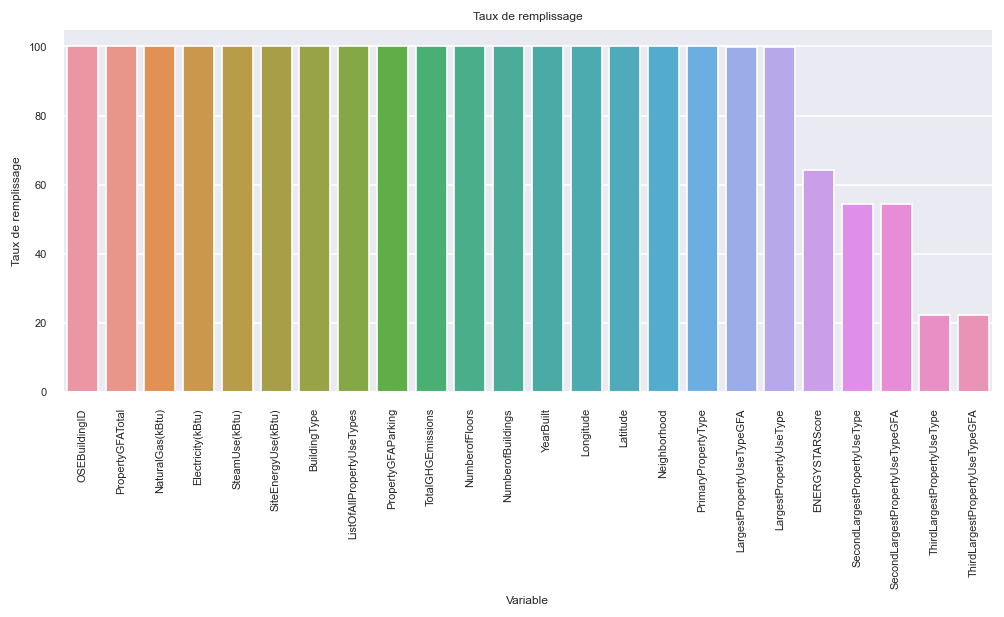

In [42]:
fig=plt.figure(figsize=(10,4),dpi=120);
sns.set(font_scale=0.6) 
ax=sns.barplot(x='Variable', y='Taux de remplissage',data=Taux_rempl_df)
plt.xticks(rotation=90);
plt.title("Taux de remplissage")

In [43]:
data.loc[data['LargestPropertyUseTypeGFA'].isnull()]
idx=data.index[data['LargestPropertyUseTypeGFA'].isnull()]

In [44]:
data.loc[idx]

OSEBuildingID    BuildingType          PrimaryPropertyType Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking                          ListOfAllPropertyUseTypes LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions
353             496  NonResidential        Self-Storage Facility      BALLARD  47.66838 -122.39310       1946                2.0               2            111445                   0  Fitness Center/Health Club/Gym, Office, Other ...                    NaN                        NaN                          NaN                              NaN                         NaN                             NaN              NaN         5.697472e+06             0.0          3007514.0         2689958.0             163.83
1147          21103  NonResidential                        Hotel     DOWNTOWN  47.61203 -122.34165       1910                1.0               8             61721                   0                                              Hotel                    NaN                        NaN                          NaN                              NaN                         NaN                             NaN             93.0         2.897080e+06             0.0          2534592.0          362488.0              36.92
2414          25568  NonResidential  Small- and Mid-Sized Office   LAKE UNION  47.64747 -122.34086       2008                1.0               4             48350                   0                                             Office                    NaN                        NaN                          NaN                              NaN                         NaN                             NaN             45.0         3.168131e+06             0.0          3168131.0               0.0              22.09
2459          25711  NonResidential                   Restaurant     DOWNTOWN  47.59697 -122.32474       1913                1.0               3             28800                   0                                         Restaurant                    NaN                        NaN                          NaN                              NaN                         NaN                             NaN              NaN         8.999242e+05             0.0           402907.0          497017.0              29.21

In [45]:
data.loc[idx,'LargestPropertyUseType']=data.loc[idx,'PrimaryPropertyType']
data.loc[idx,'LargestPropertyUseTypeGFA']=data.loc[idx,'PropertyGFATotal']
data=data.drop([353]);

In [46]:
data.loc[data['SecondLargestPropertyUseTypeGFA'].isnull()]
idx=data.index[data['SecondLargestPropertyUseTypeGFA'].isnull()]
data.loc[idx,'SecondLargestPropertyUseTypeGFA']=0
data.loc[data['LargestPropertyUseTypeGFA'].isnull()]
idx=data.index[data['ThirdLargestPropertyUseTypeGFA'].isnull()]
data.loc[idx,'ThirdLargestPropertyUseTypeGFA']=0

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1489 non-null   int64  
 1   BuildingType                     1489 non-null   object 
 2   PrimaryPropertyType              1489 non-null   object 
 3   Neighborhood                     1489 non-null   object 
 4   Latitude                         1489 non-null   float64
 5   Longitude                        1489 non-null   float64
 6   YearBuilt                        1489 non-null   int64  
 7   NumberofBuildings                1489 non-null   float64
 8   NumberofFloors                   1489 non-null   int64  
 9   PropertyGFATotal                 1489 non-null   int64  
 10  PropertyGFAParking               1489 non-null   int64  
 11  ListOfAllPropertyUseTypes        1489 non-null   object 
 12  LargestPropertyUseTy

In [48]:
data_quantit=data.select_dtypes(exclude='object')
data_quantit=data_quantit.drop(['OSEBuildingID','Latitude','Longitude'],axis=1)
data_quantit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 3375
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   YearBuilt                        1489 non-null   int64  
 1   NumberofBuildings                1489 non-null   float64
 2   NumberofFloors                   1489 non-null   int64  
 3   PropertyGFATotal                 1489 non-null   int64  
 4   PropertyGFAParking               1489 non-null   int64  
 5   LargestPropertyUseTypeGFA        1489 non-null   float64
 6   SecondLargestPropertyUseTypeGFA  1489 non-null   float64
 7   ThirdLargestPropertyUseTypeGFA   1489 non-null   float64
 8   ENERGYSTARScore                  956 non-null    float64
 9   SiteEnergyUse(kBtu)              1489 non-null   float64
 10  SteamUse(kBtu)                   1489 non-null   float64
 11  Electricity(kBtu)                1489 non-null   float64
 12  NaturalGas(kBtu)    

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_quantit_scaled = pd.DataFrame(scaler.fit_transform(data_quantit), columns = data_quantit.columns)
data_quantit_scaled.head()

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions
0   0.234783           0.009009        0.121212          0.008288            0.000000                   0.008887                         0.000000                        0.000000         0.595960             0.008204        0.014850           0.006180          0.004285           0.014864
1   0.834783           0.009009        0.111111          0.009913            0.029387                   0.008398                         0.023540                        0.010053         0.606061             0.009533        0.000000           0.005110          0.017271           0.017583
2   0.600000           0.009009        0.414141          0.101497            0.383759                   0.080609                         0.000000                        0.000000         0.424242             0.082999        0.159819           0.075537          0.005014           0.123880
3   0.226087           0.009009        0.101010          0.005375            0.000000                   0.005976                         0.000000                        0.000000         0.555556             0.007710        0.016410           0.004389          0.006080           0.017024
4   0.695652           0.009009        0.181818          0.017649            0.120950                   0.012646                         0.106276                        0.000000         0.747475             0.016153        0.000000           0.008345          0.029553           0.029980

In [50]:
#Avant imputation                                   
idx=data_quantit_scaled.index[data_quantit_scaled['ENERGYSTARScore'].isnull()]
data_quantit_scaled.loc[idx,'ENERGYSTARScore']

5      NaN
7      NaN
14     NaN
15     NaN
17     NaN
        ..
1484   NaN
1485   NaN
1486   NaN
1487   NaN
1488   NaN
Name: ENERGYSTARScore, Length: 533, dtype: float64

In [51]:
#après imputation sur variables scaled
imputer = KNNImputer(n_neighbors=5)
imputed =imputer.fit_transform(data_quantit_scaled)
imputed = pd.DataFrame(imputed, columns=data_quantit_scaled.columns)
imputed
imputed.loc[idx,'ENERGYSTARScore']

5       0.345455
7       0.450505
14      0.793939
15      0.519192
17      0.517172
          ...   
1484    0.717172
1485    0.579798
1486    0.139394
1487    0.385859
1488    0.430303
Name: ENERGYSTARScore, Length: 533, dtype: float64

In [52]:
#après imputation sur variables not-scaled
inverse_data_quantit_scaled=pd.DataFrame(scaler.inverse_transform(imputed),columns=imputed.columns)
inverse_data_quantit_scaled.loc[idx,'ENERGYSTARScore']

5       35.2
7       45.6
14      79.6
15      52.4
17      52.2
        ... 
1484    72.0
1485    58.4
1486    14.8
1487    39.2
1488    43.6
Name: ENERGYSTARScore, Length: 533, dtype: float64

In [53]:
#statistiques avant imputation pour variable 'ENERGYSTARScore'
data_quantit['ENERGYSTARScore'].describe()

count    956.000000
mean      63.785565
std       28.660406
min        1.000000
25%       44.000000
50%       71.000000
75%       88.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

In [54]:
#statistiques après imputation pour variable 'ENERGYSTARScore'
inverse_data_quantit_scaled['ENERGYSTARScore'].describe()

count    1489.000000
mean       63.135527
std        24.504898
min         1.000000
25%        49.200000
50%        66.200000
75%        82.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

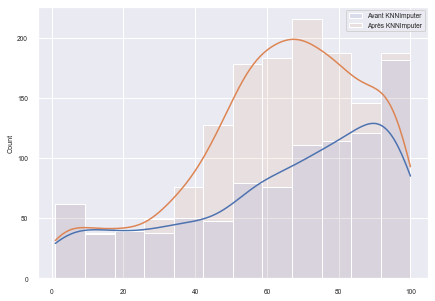

In [55]:
k=(1+np.log2(data_quantit['ENERGYSTARScore'].shape[0])).round().astype(int)
distrib_comp=pd.DataFrame()
distrib_comp['Avant KNNImputer']=data_quantit['ENERGYSTARScore'].values
distrib_comp['Après KNNImputer']=inverse_data_quantit_scaled['ENERGYSTARScore'].values
fig=plt.figure(figsize=[7,5])
ax=sns.histplot(data=distrib_comp,kde=True, element="bars",bins=k,alpha=0.1)

In [56]:
import scipy.stats as stats
kstest = stats.ks_2samp(data_quantit['ENERGYSTARScore'].notnull(),inverse_data_quantit_scaled['ENERGYSTARScore'])
print(kstest)

KstestResult(statistic=0.9885829415715245, pvalue=0.0)


In [57]:
data['ENERGYSTARScore_imputed']=inverse_data_quantit_scaled['ENERGYSTARScore'].values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 3375
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1489 non-null   int64  
 1   BuildingType                     1489 non-null   object 
 2   PrimaryPropertyType              1489 non-null   object 
 3   Neighborhood                     1489 non-null   object 
 4   Latitude                         1489 non-null   float64
 5   Longitude                        1489 non-null   float64
 6   YearBuilt                        1489 non-null   int64  
 7   NumberofBuildings                1489 non-null   float64
 8   NumberofFloors                   1489 non-null   int64  
 9   PropertyGFATotal                 1489 non-null   int64  
 10  PropertyGFAParking               1489 non-null   int64  
 11  ListOfAllPropertyUseTypes        1489 non-null   object 
 12  LargestPropertyUseTy

# Analyse univariée

## Variables quantitatives

In [58]:
data_quantit=data.select_dtypes(exclude='object')
data_quantit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 3375
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1489 non-null   int64  
 1   Latitude                         1489 non-null   float64
 2   Longitude                        1489 non-null   float64
 3   YearBuilt                        1489 non-null   int64  
 4   NumberofBuildings                1489 non-null   float64
 5   NumberofFloors                   1489 non-null   int64  
 6   PropertyGFATotal                 1489 non-null   int64  
 7   PropertyGFAParking               1489 non-null   int64  
 8   LargestPropertyUseTypeGFA        1489 non-null   float64
 9   SecondLargestPropertyUseTypeGFA  1489 non-null   float64
 10  ThirdLargestPropertyUseTypeGFA   1489 non-null   float64
 11  ENERGYSTARScore                  956 non-null    float64
 12  SiteEnergyUse(kBtu) 

In [59]:
data_quantit=data_quantit.drop(['OSEBuildingID',
                                'Latitude',
                                'Longitude',
                                'YearBuilt',
                                'NumberofBuildings',
                                'NumberofFloors'],axis=1)

In [60]:
data_quantit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 3375
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PropertyGFATotal                 1489 non-null   int64  
 1   PropertyGFAParking               1489 non-null   int64  
 2   LargestPropertyUseTypeGFA        1489 non-null   float64
 3   SecondLargestPropertyUseTypeGFA  1489 non-null   float64
 4   ThirdLargestPropertyUseTypeGFA   1489 non-null   float64
 5   ENERGYSTARScore                  956 non-null    float64
 6   SiteEnergyUse(kBtu)              1489 non-null   float64
 7   SteamUse(kBtu)                   1489 non-null   float64
 8   Electricity(kBtu)                1489 non-null   float64
 9   NaturalGas(kBtu)                 1489 non-null   float64
 10  TotalGHGEmissions                1489 non-null   float64
 11  ENERGYSTARScore_imputed          1489 non-null   float64
dtypes: float64(10), int6

whis_low  quant25   median   quant75  whis_high      IQR
0  -88240.0  28820.0  48006.0  106860.0   223920.0  78040.0

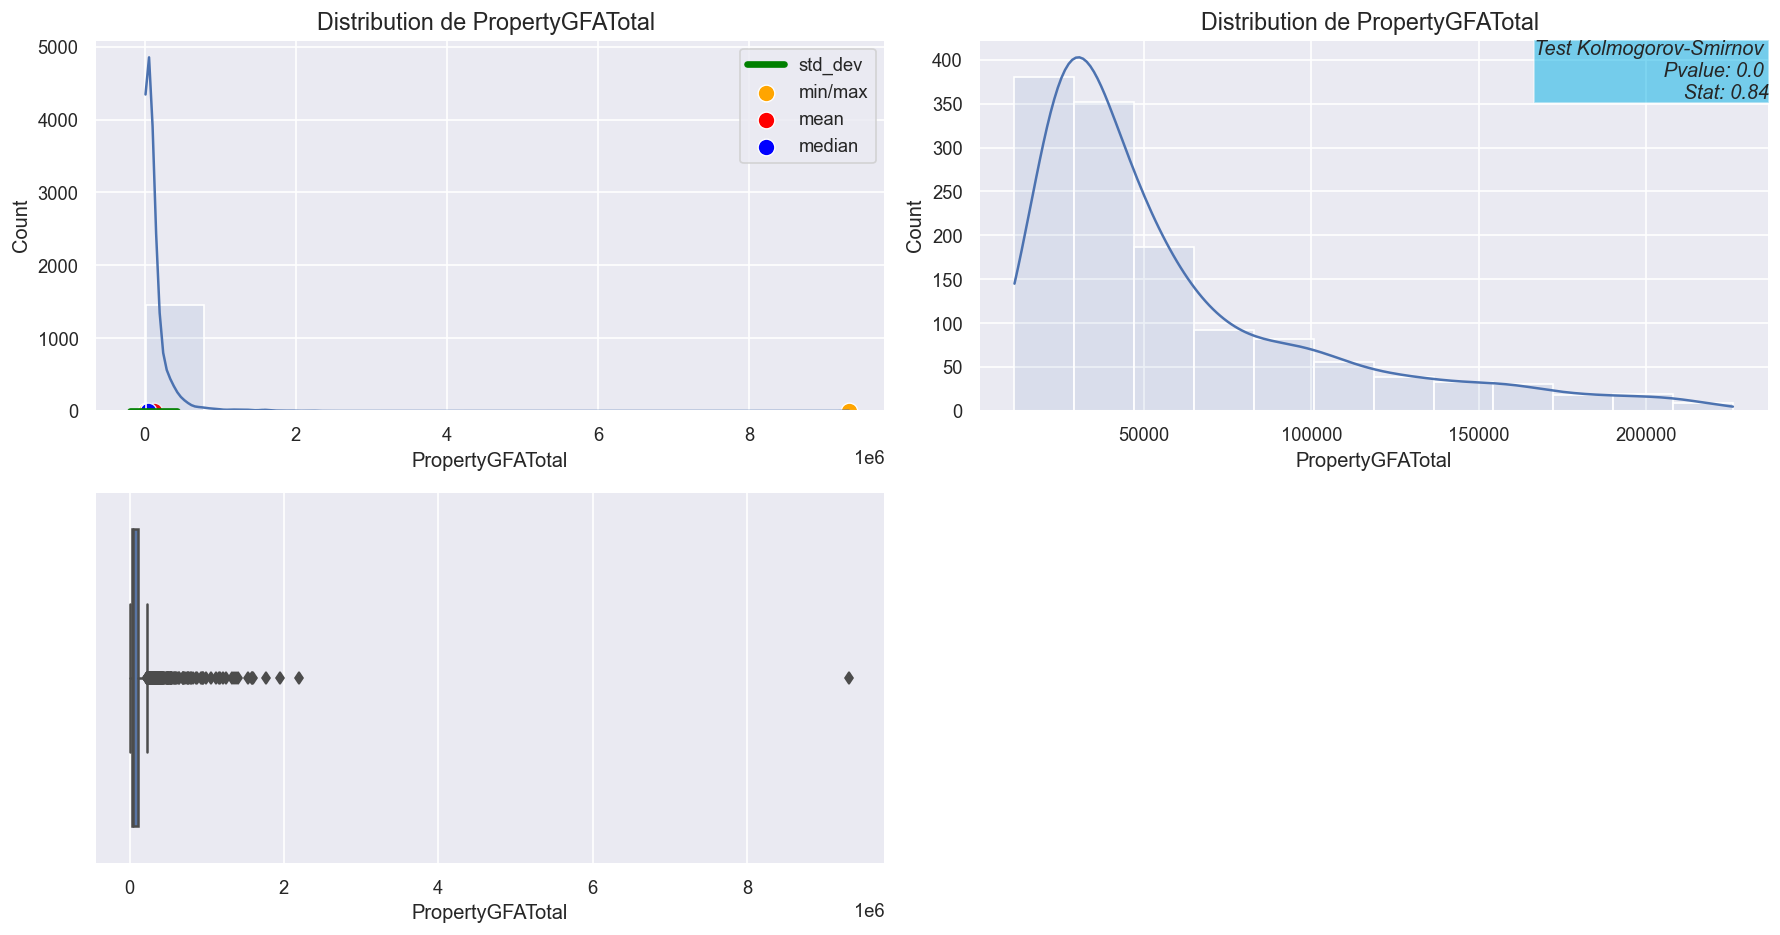

In [61]:
import scipy.stats as stats

def Univar_Analysis(var,lim=None,pos=1): 
    count=round(data_quantit[var].shape[0],0)
    miss=round(data_quantit[var].isna().sum(),0)
    mini=data_quantit[var].min()
    maxi=round(data_quantit[var].max(),1)
    ran = round(data_quantit[var].max()-data_quantit[var].min(),1)
    mean = round(data_quantit[var].mean(),1)
    median = data_quantit[var].median()
    st_dev = data_quantit[var].std()
    int_std=[round(mean-st_dev,1),round(mean+st_dev,1)]
    skew = data_quantit[var].skew()
    kurt = data_quantit[var].kurtosis()
    stat=np.array([[count,miss,mini,maxi,ran,mean,median,int_std,skew,kurt]],dtype=object)
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
    param=pd.DataFrame(stat,columns=['count','missing values','min','max','range','mean','median','stdev','skewness','kurtosis'])   
    param.round(2)
    param = param.style.set_caption('Variable '+var).set_table_styles([{'selector': 'caption','props': [('color', 'red'),('font-size', '16px')]}])
    display(param)
    sns.set()
    fig=plt.figure(figsize=[15,15],dpi=120)
    fig.add_subplot(4,2,1)
    k=(1+np.log2(data[var].shape[0])).round().astype(int)
    ax=sns.histplot(data=data,x=var,kde=True, element="bars",bins=k,alpha=0.1)
    ax.set_title("Distribution de {} ".format(var),fontsize = 14)
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max",s=100)
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean",s=100)
    sns.lineplot(x=int_std, y=[0,0], color = 'green', label = "std_dev",linewidth = 4)
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median",s=100)
    quant25 = data_quantit[var].quantile(0.25)
    quant75 = data_quantit[var].quantile(0.75)
    IQR = quant75 - quant25
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    box_plt=[whis_low,quant25,median,quant75,whis_high,IQR]
    stat_box=np.array([box_plt])
    param_box=pd.DataFrame(stat_box,columns=['whis_low','quant25','median','quant75','whis_high','IQR'])
    param_box.round(2)
    display(param_box)
    if lim is not None:
        fig.add_subplot(4,2,2)
        ax=sns.histplot(data=data[data[var]<lim],x=var,kde=True, element="bars",bins=k,alpha=0.1)
        #test Kolmogorof-Smirnov
        kstest = stats.kstest(data[var].notnull(),'norm')
        ax.set_title("Distribution de {} ".format(var),fontsize = 14)
        ax.text(pos, 1, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
                horizontalalignment='right',
                verticalalignment='top',
                style='italic', transform=ax.transAxes, fontsize = 12,
                bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
        fig.add_subplot(4,2,3)
        ax = sns.boxplot(x=data[var], showfliers=True)
        plt.xlabel(var,fontsize=12);

    else:            
        #test Kolmogorof-Smirnov
        kstest = stats.kstest(data[var].notnull(),'norm')
        ax.set_title("Distribution de {} ".format(var),fontsize = 14)
        ax.text(pos, 0.5, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
                horizontalalignment='right',
                verticalalignment='top',
                style='italic', transform=ax.transAxes, fontsize = 12,
                bbox={'facecolor':'#00afe6', 'alpha':0.7, 'pad':0})
        fig.add_subplot(4,2,2)
        ax = sns.boxplot(x=data[var], showfliers=True)

    fig.tight_layout()
    plt.show()
    
Univar_Analysis('PropertyGFATotal',226000)

whis_low  quant25  median  quant75  whis_high  IQR
0       0.0      0.0     0.0      0.0        0.0  0.0

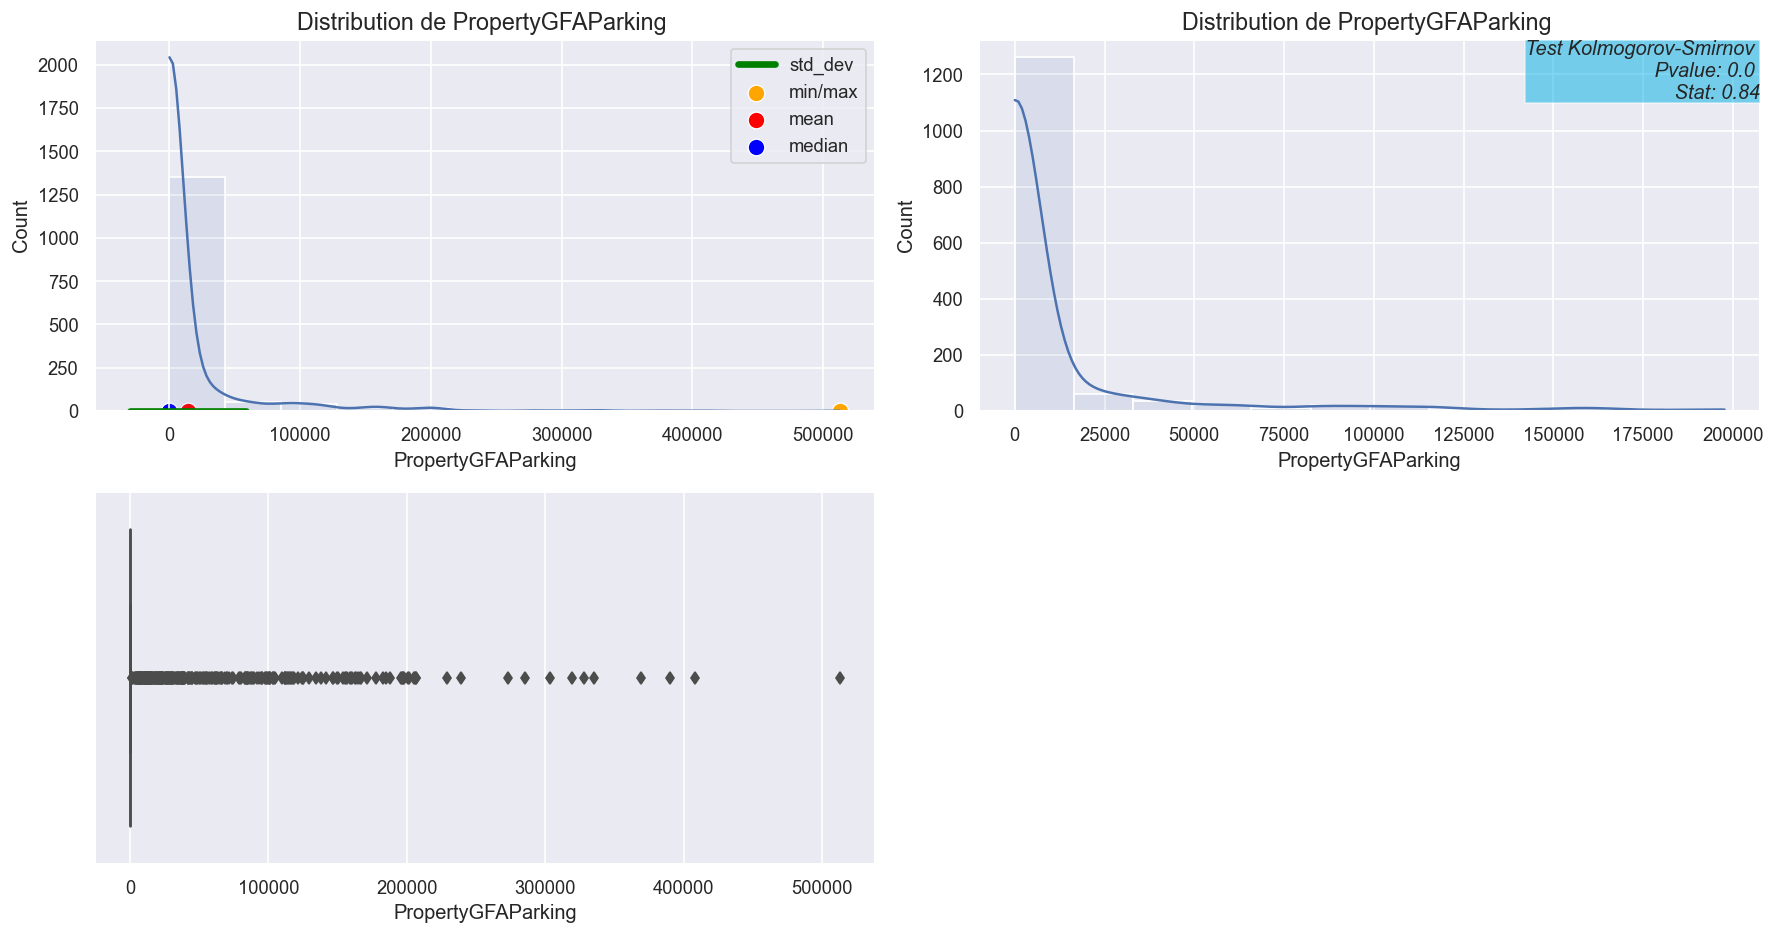

In [63]:
Univar_Analysis('PropertyGFAParking',200000)

whis_low  quant25   median  quant75  whis_high      IQR
0  -75259.0  25100.0  41920.0  92006.0   192365.0  66906.0

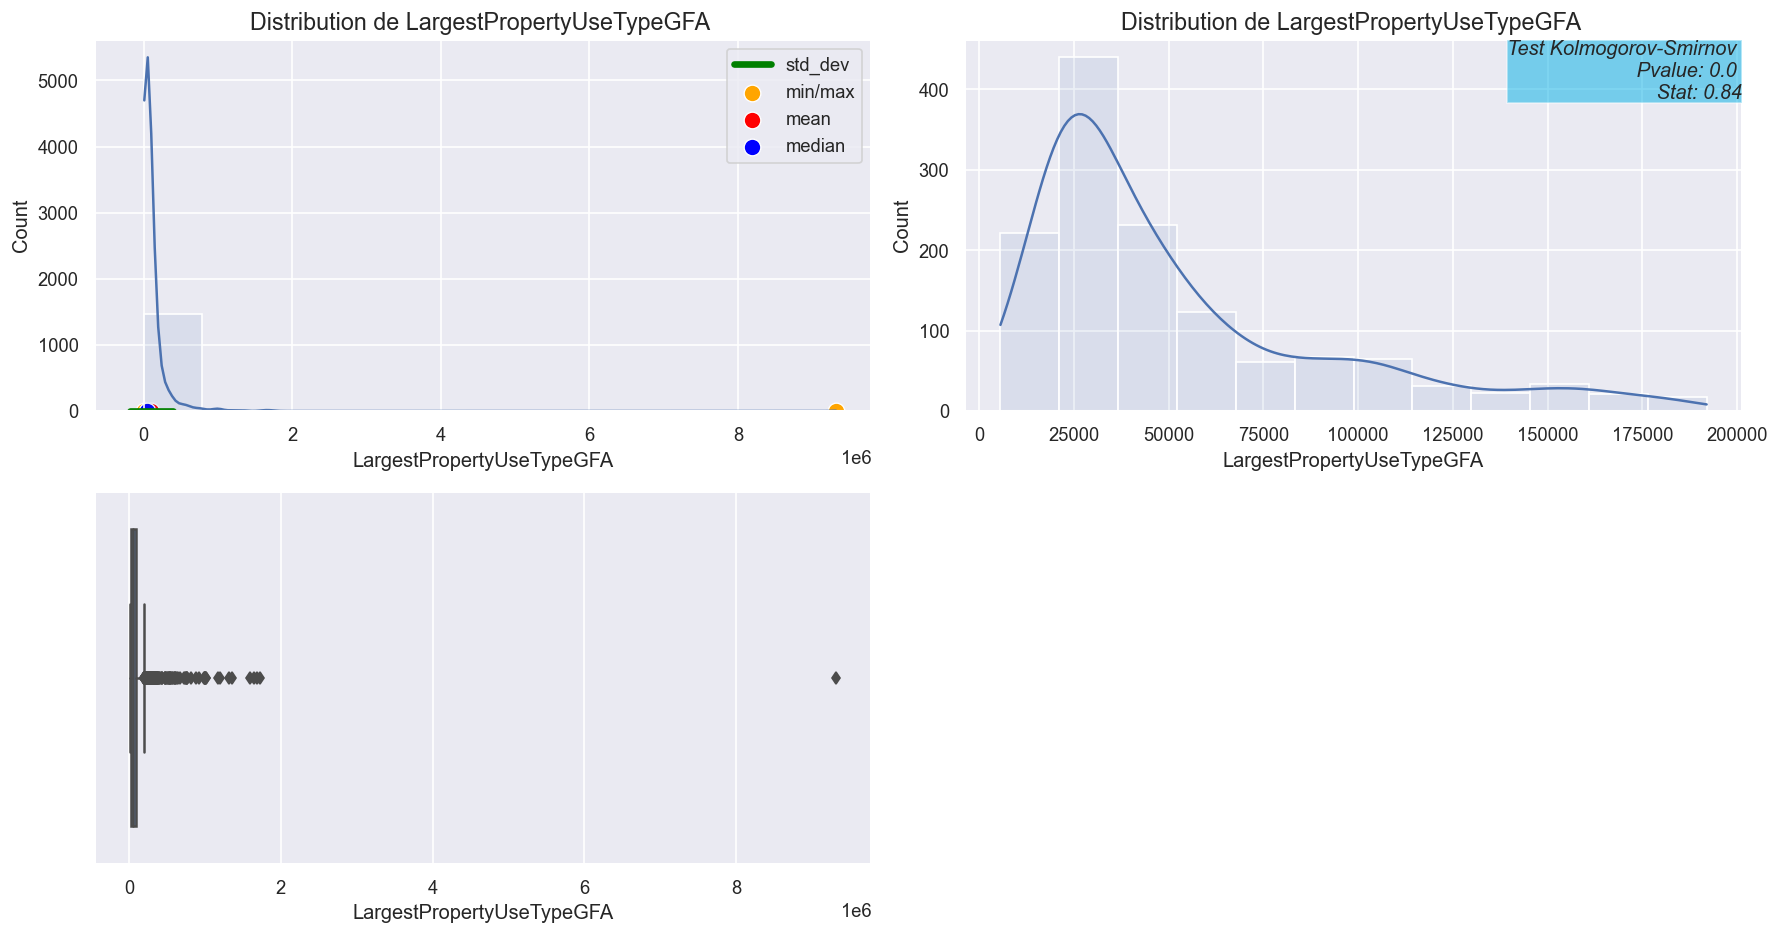

In [65]:
Univar_Analysis('LargestPropertyUseTypeGFA',193000)

whis_low  quant25  median  quant75  whis_high      IQR
0  -20490.0      0.0     0.0  13660.0    34150.0  13660.0

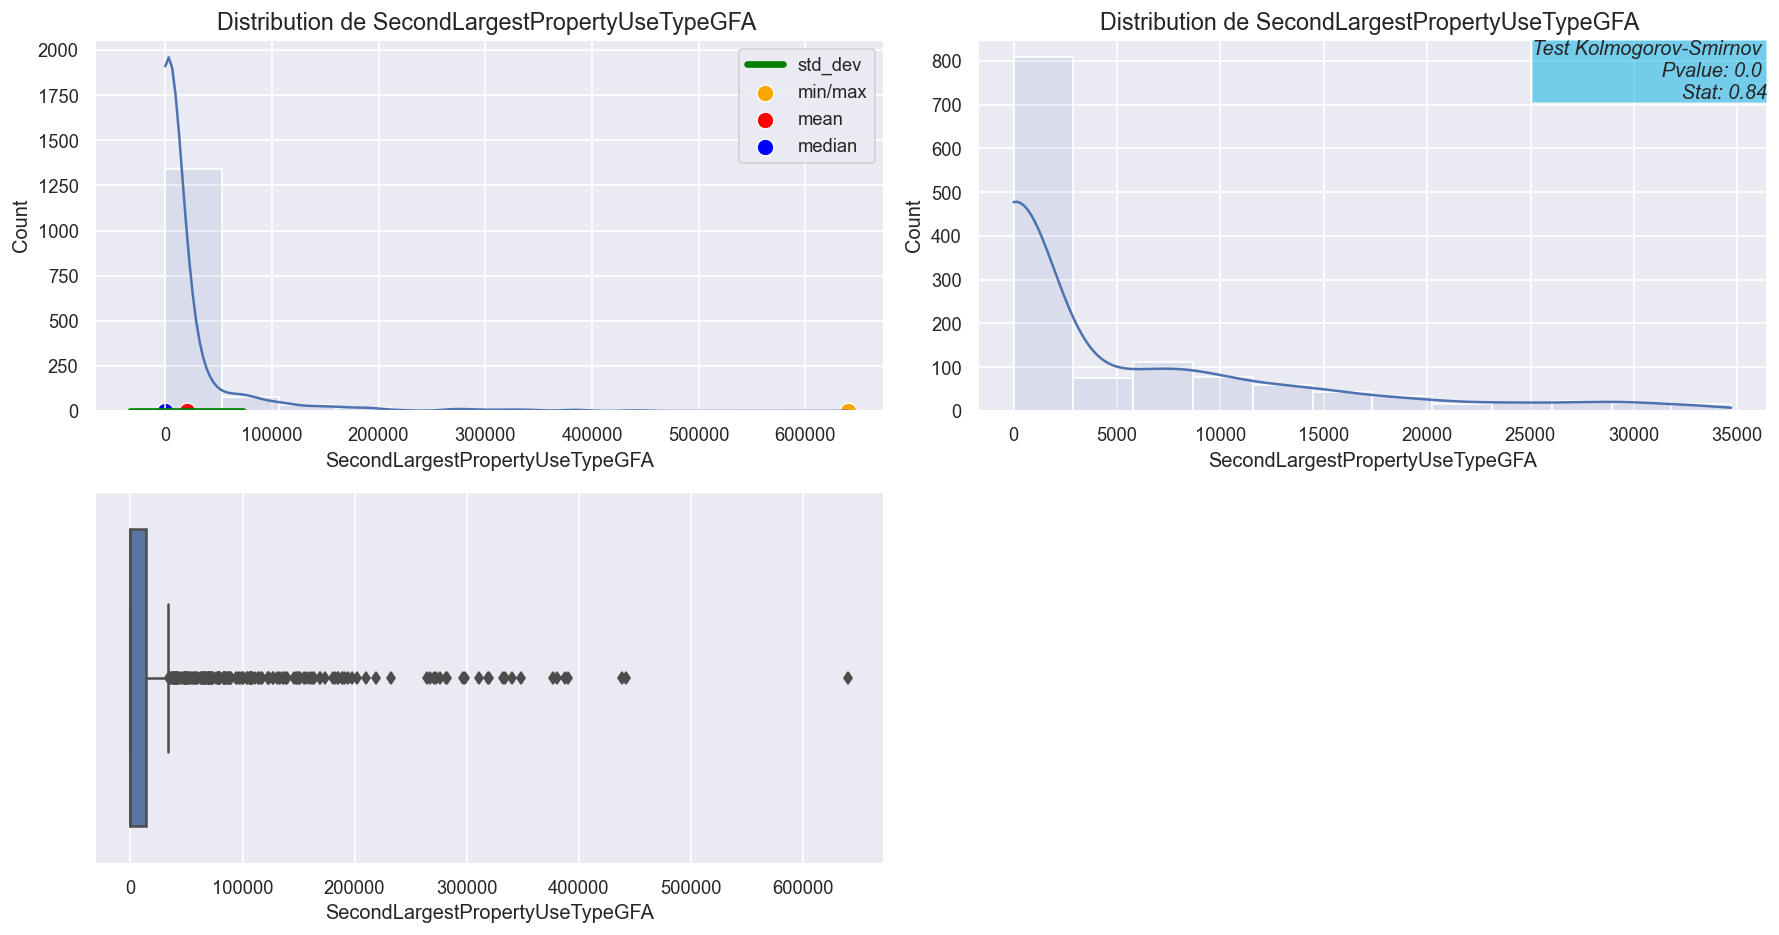

In [66]:
Univar_Analysis('SecondLargestPropertyUseTypeGFA',35000)

whis_low  quant25  median  quant75  whis_high  IQR
0       0.0      0.0     0.0      0.0        0.0  0.0

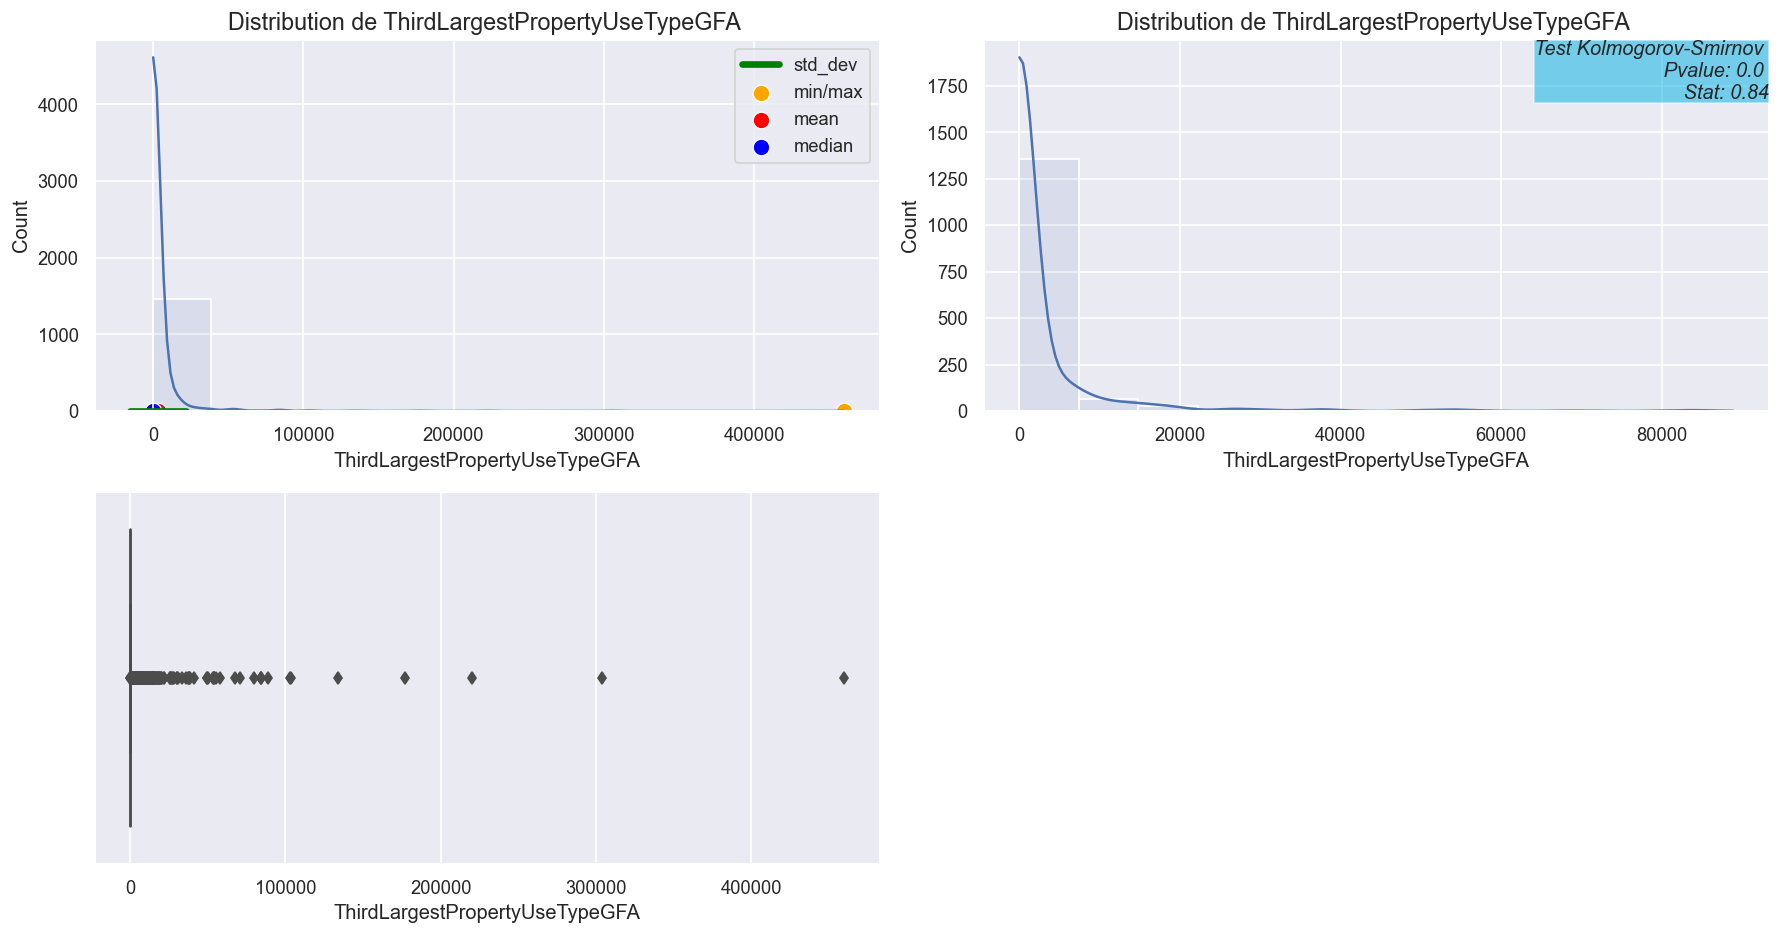

In [68]:
Univar_Analysis('ThirdLargestPropertyUseTypeGFA',100000)

whis_low    quant25     median    quant75    whis_high        IQR
0 -7852432.25  1242311.5  2686765.0  7305474.0  16400217.75  6063162.5

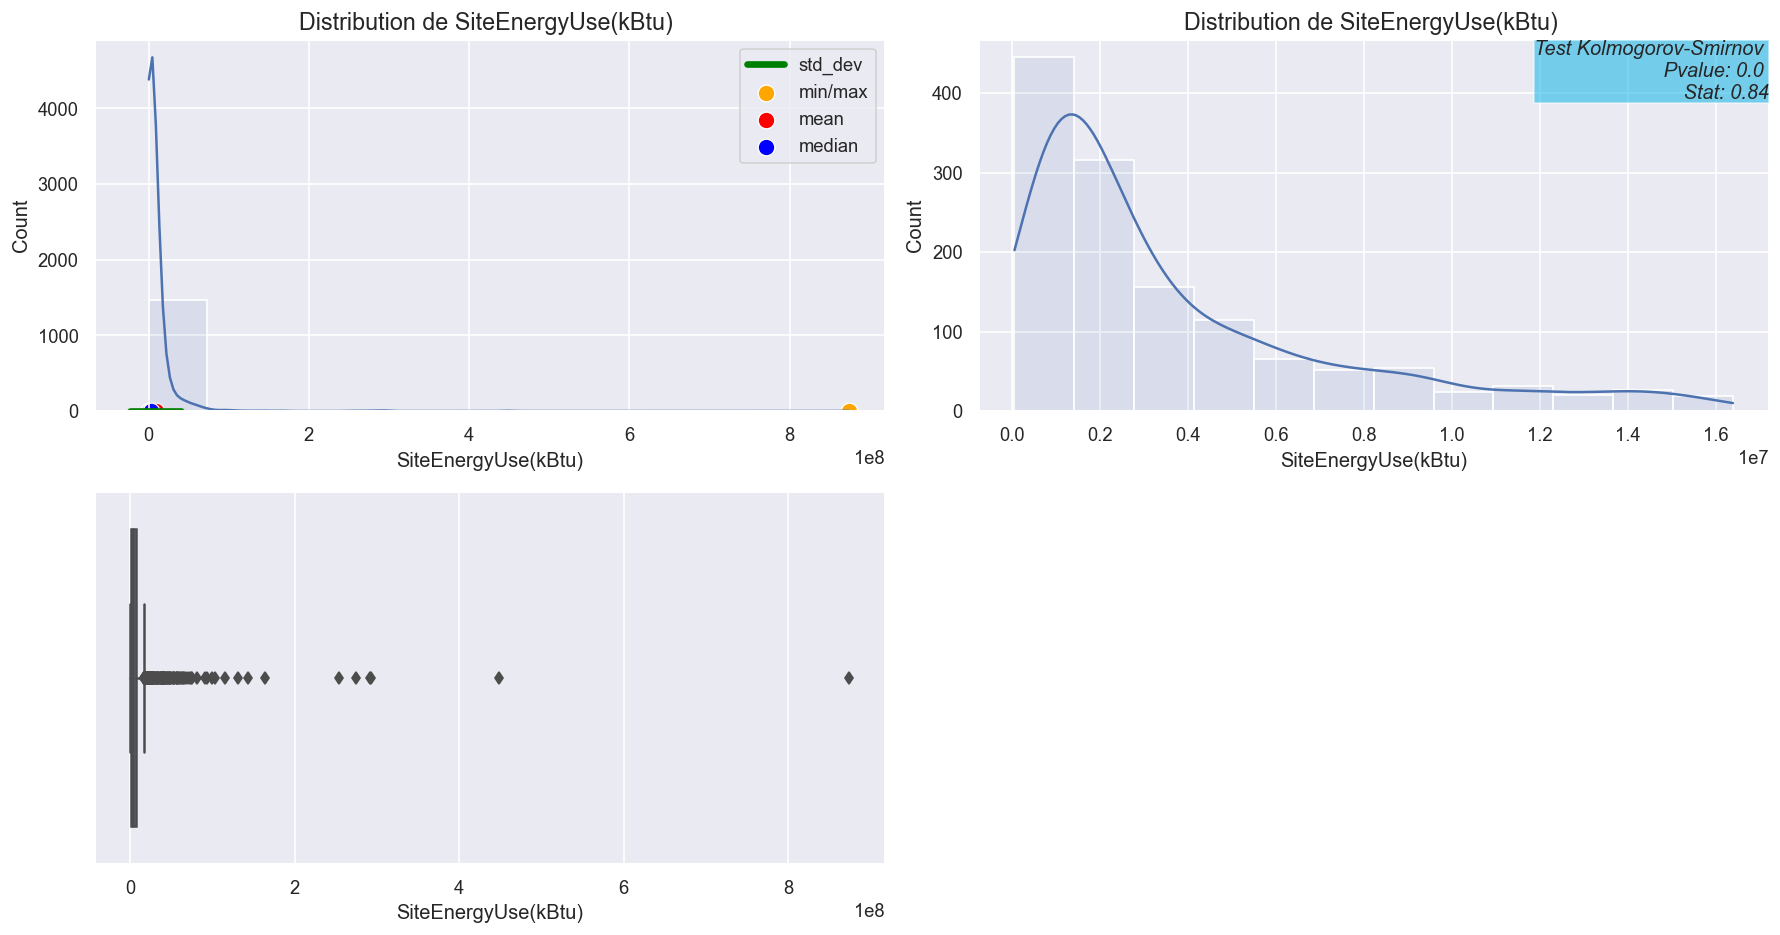

In [70]:
Univar_Analysis('SiteEnergyUse(kBtu)',1.64e+07)

whis_low  quant25  median  quant75  whis_high     IQR
0   -164.81    20.08   49.17   143.34     328.23  123.26

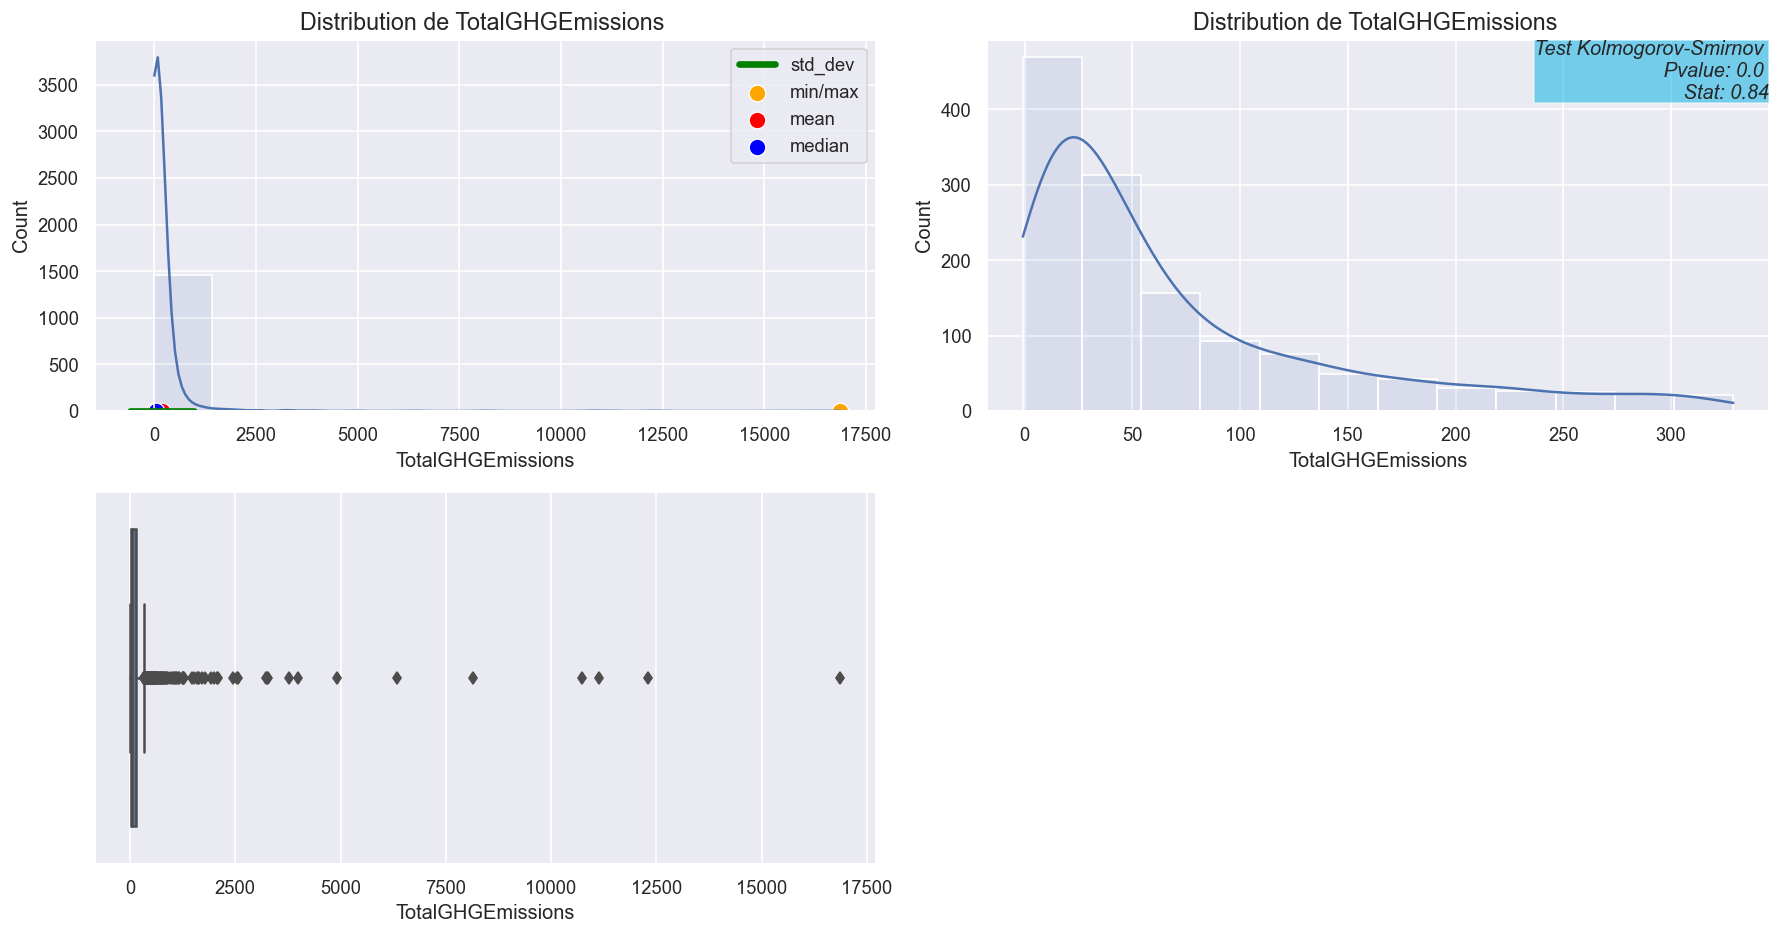

In [72]:
Univar_Analysis('TotalGHGEmissions',331)

whis_low  quant25  median  quant75  whis_high   IQR
0     -22.0     44.0    71.0     88.0      154.0  44.0

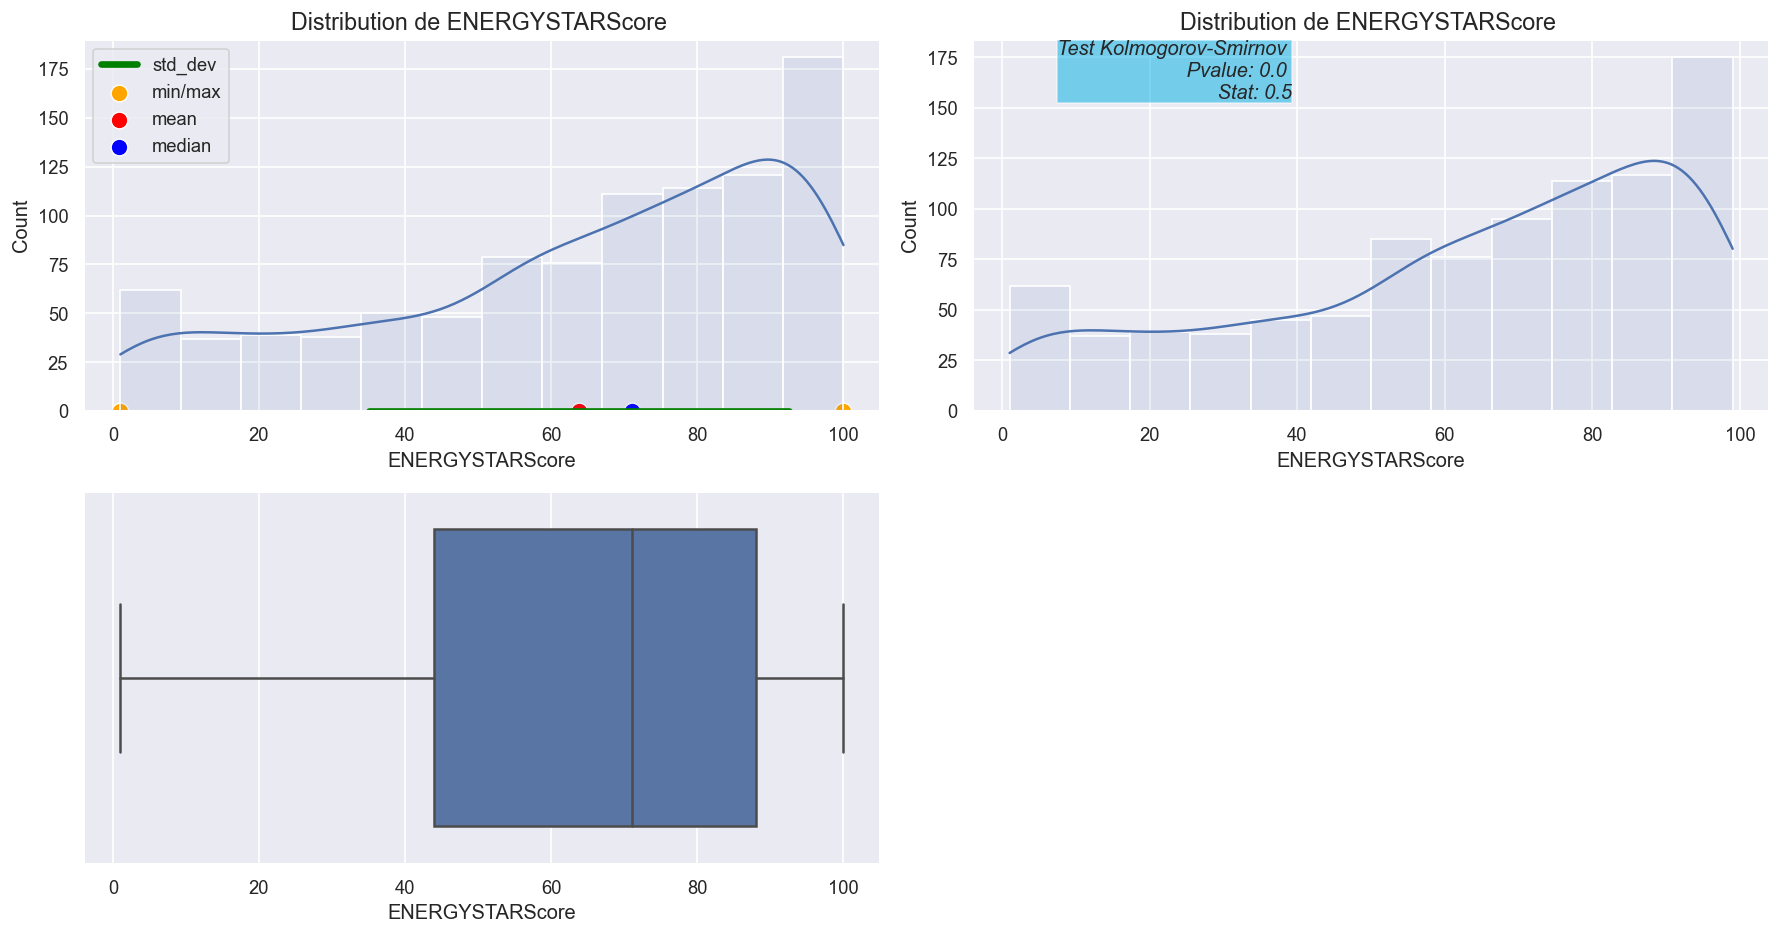

In [73]:
Univar_Analysis('ENERGYSTARScore',100,pos=0.4)

## Variables qualitatives

### Variables 'YearBuilt', NumberofBuildings, NumberofFloors

In [74]:
data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   BuildingType                  1489 non-null   object
 1   PrimaryPropertyType           1489 non-null   object
 2   Neighborhood                  1489 non-null   object
 3   ListOfAllPropertyUseTypes     1489 non-null   object
 4   LargestPropertyUseType        1489 non-null   object
 5   SecondLargestPropertyUseType  812 non-null    object
 6   ThirdLargestPropertyUseType   331 non-null    object
dtypes: object(7)
memory usage: 125.4+ KB


['1900-1920' '1920-1940' '1940-1960' '1960-1980' '1980-2000' '2000-2020']


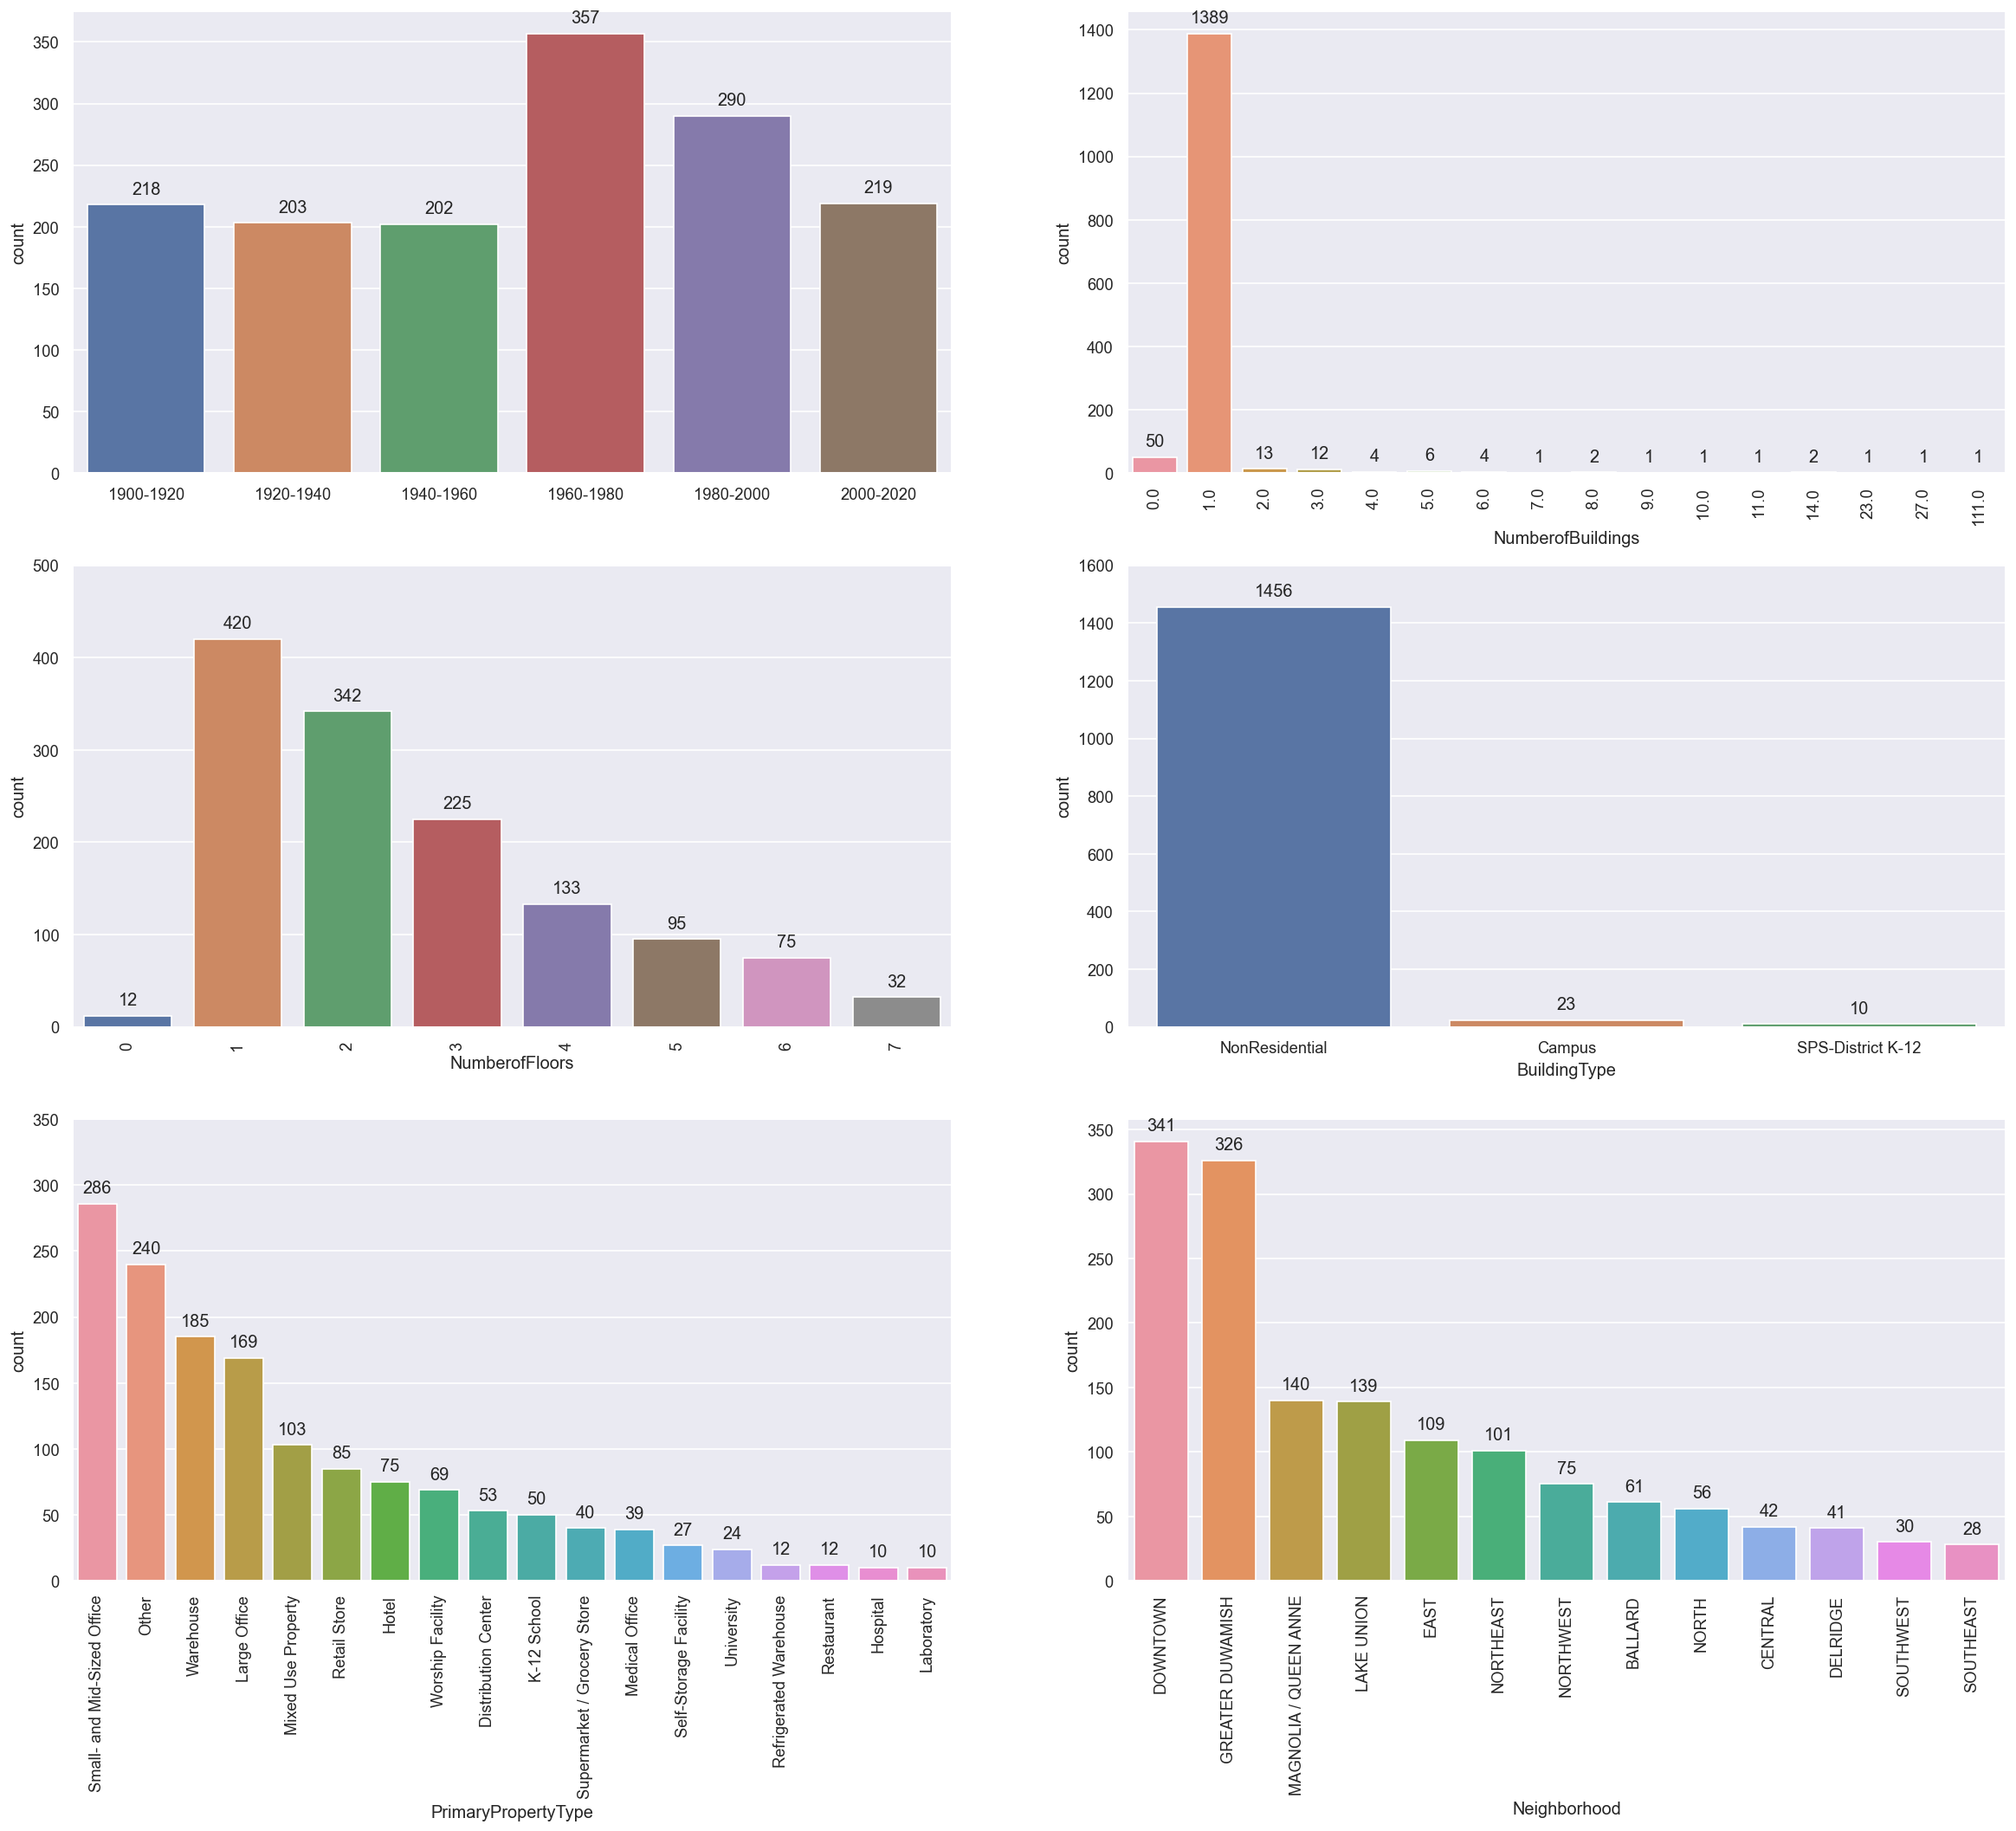

In [75]:
fig=plt.figure(figsize=[24,20],dpi=120)
fig.add_subplot(3,2,1)
bins=[1900,1920,1940,1960,1980,2000,2020]
bin_values,bin_edges=np.histogram(data['YearBuilt'].values,bins=bins)
labels=[f'{b0}-{b1}' for b0,b1 in zip(bins[0:-1],bins[1::])]
print(np.array(labels))
ax=sns.barplot(x=labels,y=np.array(bin_values))
colors = sns.color_palette('pastel')[0:len(data['YearBuilt'].unique())]
for rect in ax.patches:
    y_value = int(rect.get_height())
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    va='bottom'
    ax.annotate(y_value,(x_value, y_value),xytext=(0, space),textcoords="offset points",ha='center',va=va)
plt.ylabel('count')
    
fig.add_subplot(3,2,2)
ax=sns.countplot(x='NumberofBuildings',data=data)
total_sum=data['NumberofBuildings'].sum()
colors = sns.color_palette('pastel')[0:len(data['NumberofBuildings'].unique())]
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    va='bottom'
    ax.annotate(y_value,(x_value, y_value),xytext=(0, space),textcoords="offset points",ha='center',va=va)

plt.xticks(rotation=90)

fig.add_subplot(3,2,3)
data1=data[data['NumberofFloors']<8]
ax=sns.countplot(x='NumberofFloors',data=data1)
total_sum=data['NumberofFloors'].sum()
colors = sns.color_palette('pastel')[0:len(data['NumberofFloors'].unique())]
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    va='bottom'
    ax.annotate(y_value,(x_value, y_value),xytext=(0, space),textcoords="offset points",ha='center',va=va)
    
ax.set_ylim([0,500])
plt.xticks(rotation=90)

fig.add_subplot(3,2,4)
ax=sns.countplot(x='BuildingType',data=data)
colors = sns.color_palette('pastel')[0:len(data['BuildingType'].unique())]
for rect in ax.patches:
    y_value = int(rect.get_height())
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    va='bottom'
    ax.annotate(y_value,(x_value, y_value),xytext=(0, space),textcoords="offset points",ha='center',va=va)                      
                                        
ax.set_ylim([0,1600])
plt.xticks(rotation=0)

fig.add_subplot(3,2,5)
ax=sns.countplot(x='PrimaryPropertyType',data=data,order = data['PrimaryPropertyType'].value_counts().index)
colors = sns.color_palette('pastel')[0:len(data['PrimaryPropertyType'].unique())]
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    va='bottom'
    ax.annotate(y_value,(x_value, y_value),xytext=(0, space),textcoords="offset points",ha='center',va=va)
ax.set_ylim([0,350])
plt.xticks(rotation=90)

fig.add_subplot(3,2,6)
ax=sns.countplot(x='Neighborhood',data=data,order = data['Neighborhood'].value_counts().index)
colors = sns.color_palette('pastel')[0:len(data['Neighborhood'].unique())]
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    va='bottom'
    ax.annotate(y_value,(x_value, y_value),xytext=(0, space),textcoords="offset points",ha='center',va=va)
    
plt.xticks(rotation=90)

plt.tight_layout
plt.show()



# Analyse bivariée

## Variables quantitatives 

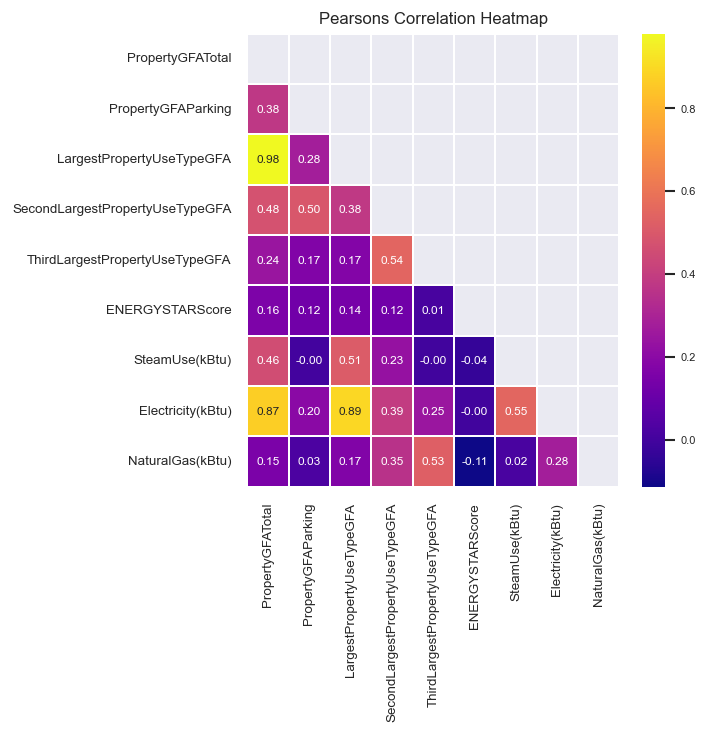

In [76]:
data_quantit=data_quantit.drop(['SiteEnergyUse(kBtu)','TotalGHGEmissions','ENERGYSTARScore_imputed'],axis=1)
sns.set(font_scale=0.6) 
sns.set_style('darkgrid')
plt.figure(dpi = 120,figsize= (5,5))
mask = np.triu(np.ones_like(data_quantit.corr(),dtype = bool))
sns.heatmap(data_quantit.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
sns.set(font_scale=0.6)
plt.yticks(rotation = 0,fontsize=8)
plt.xticks(rotation = 90,fontsize=8)
plt.title('Pearsons Correlation Heatmap',fontsize= 10)
plt.show()

<Figure size 720x480 with 0 Axes>

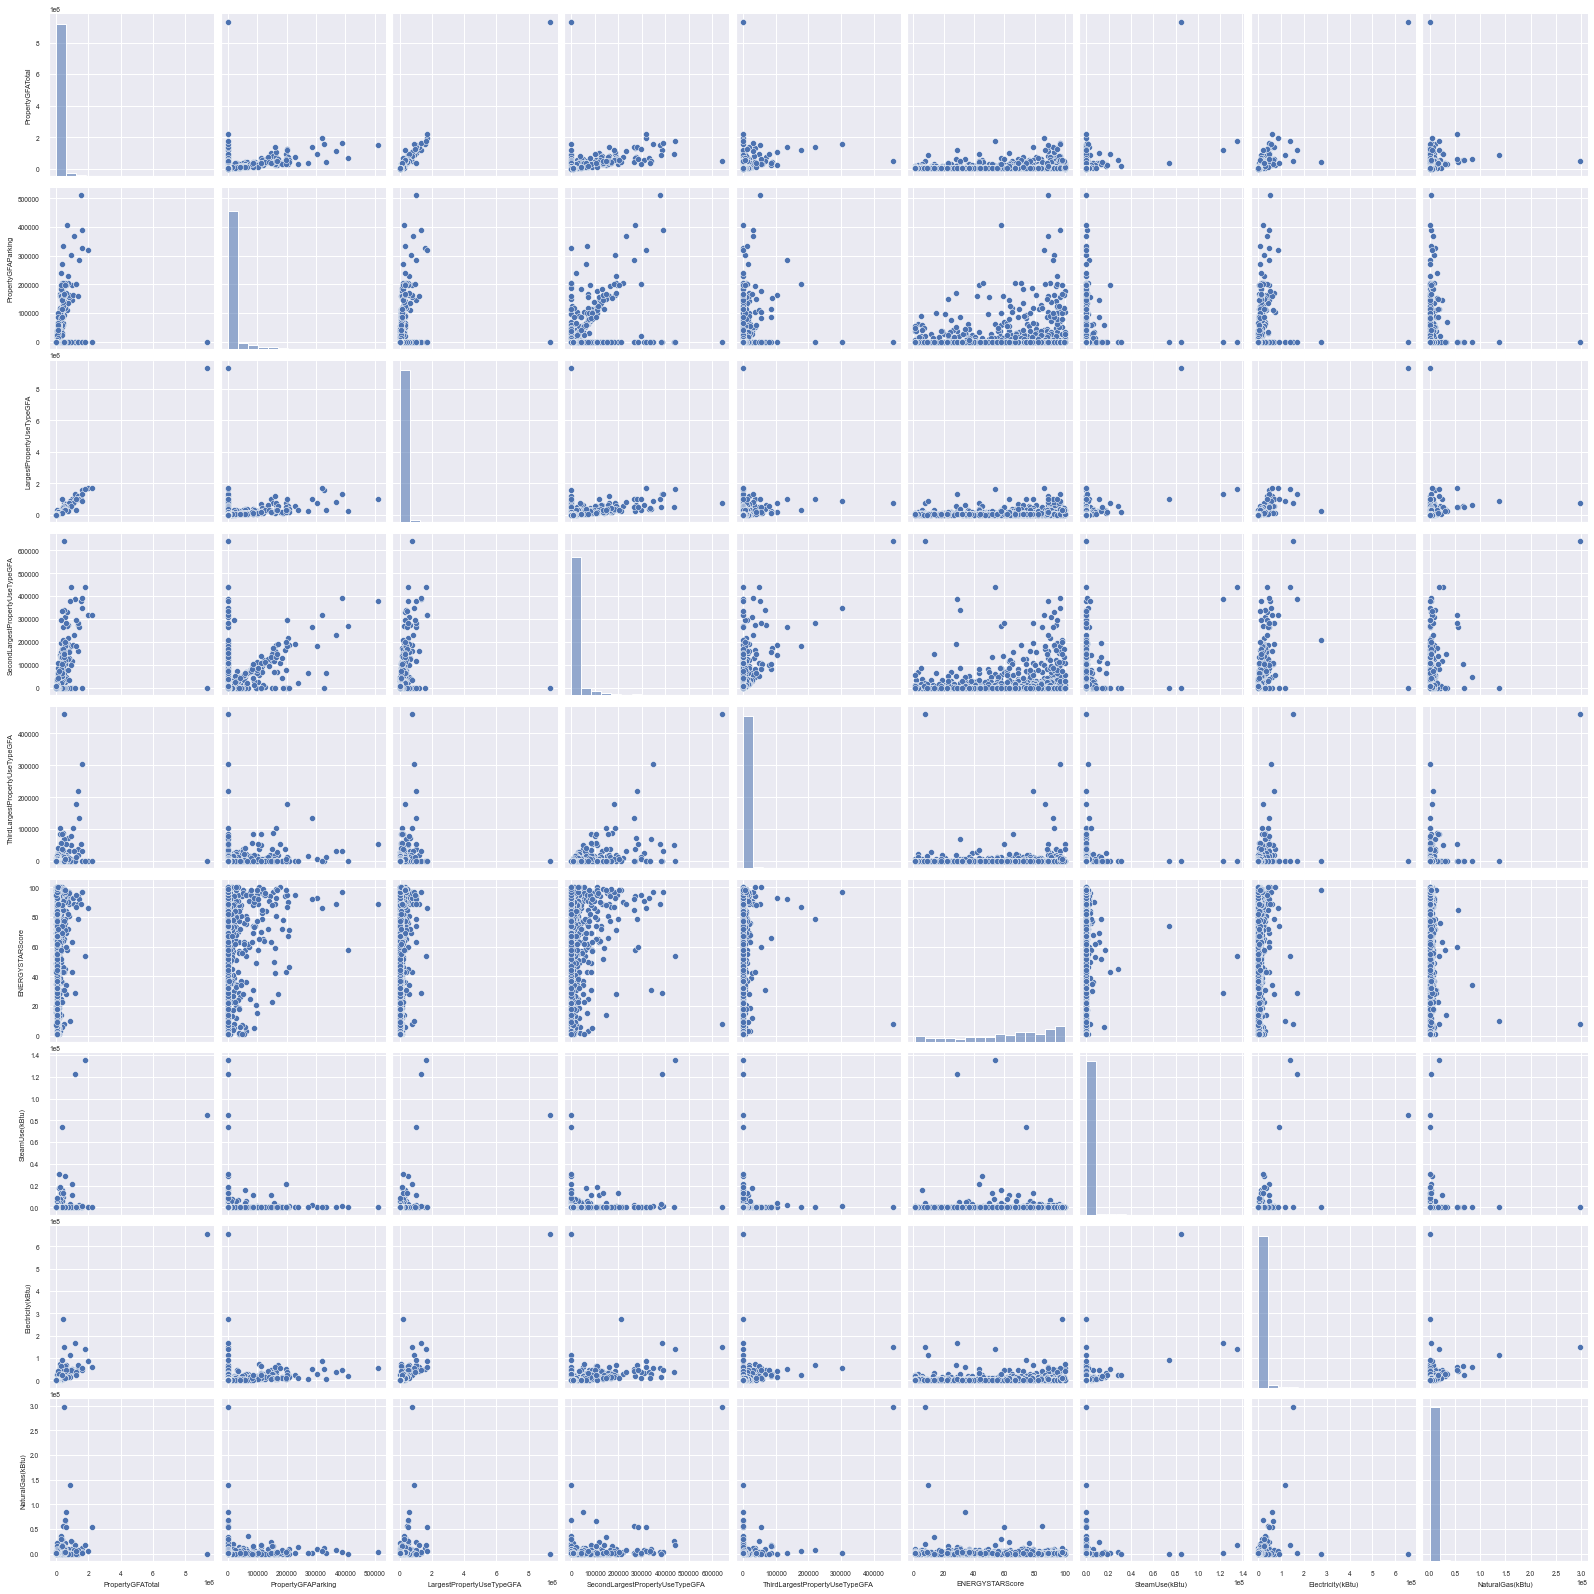

In [77]:
plt.figure(dpi = 120)
sns.pairplot(data_quantit,diag_kind = "hist",diag_kws = {'alpha':0.55, 'bins':15})
plt.show()

C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


<Figure size 1800x1800 with 0 Axes>

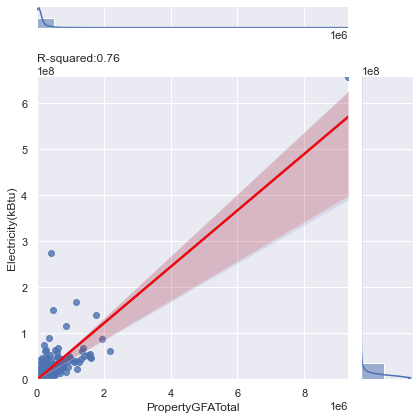

<Figure size 1800x1800 with 0 Axes>

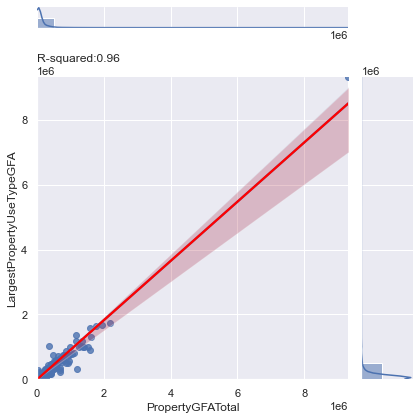

In [78]:
import pingouin as pg
def join_graph(x,y,kind,x_min=None,x_max=None,y_min=None,y_max=None):
    R=pg.corr(data_quantit[x].tolist(), data_quantit[y].tolist()).r[0]
    text='R-squared:'+str((R**2).round(2))
    sns.set()
    g = sns.jointplot(x = x,
              y = y,
              data = data_quantit, 
              kind = kind,
              marginal_kws=dict(bins=19),
              height=6)
    g1=sns.regplot(x=data_quantit[x], y=data_quantit[y], ax=g.ax_joint, scatter=False, color='red');
    g1.text(0,y_max*1.05,text,fontsize=12)
    g1.set_xlim(x_min,x_max)
    g1.set_ylim(y_min,y_max)
    return

var_list=['Electricity(kBtu)','LargestPropertyUseTypeGFA']

for var in var_list:
    plt.figure(dpi = 120,figsize= (15,15))
    join_graph('PropertyGFATotal',var,'reg',0,data_quantit['PropertyGFATotal'].values.max(),0,data_quantit[var].values.max())
    plt.tight_layout()

<Figure size 1800x1800 with 0 Axes>

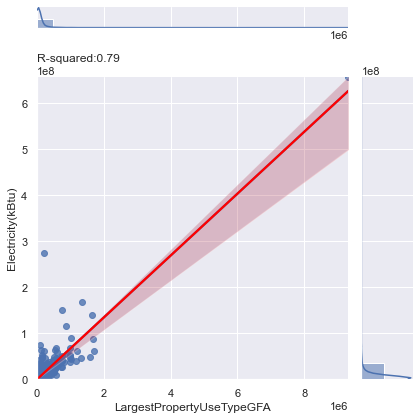

In [79]:
var_list=['Electricity(kBtu)']

for var in var_list:
    plt.figure(dpi = 120,figsize= (15,15))
    join_graph('LargestPropertyUseTypeGFA',var,'reg',0,data_quantit['LargestPropertyUseTypeGFA'].values.max(),0,data_quantit[var].values.max())
    plt.tight_layout()

In [80]:
data.shape

(1489, 25)

## Variables qualitatives

In [81]:
import folium
from folium import plugins
m=folium.Map([47.6,-122.3],
           width="%100",
           height="%100",
           zoom_start=10,
           )

location=data[['Latitude','Longitude']]

plugins.MarkerCluster(location).add_to(m)
m

In [82]:
data.describe()

OSEBuildingID     Latitude    Longitude    YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore_imputed
count    1489.000000  1489.000000  1489.000000  1489.000000        1489.000000     1489.000000      1.489000e+03         1489.000000               1.489000e+03                      1489.000000                     1489.000000       956.000000         1.489000e+03    1.489000e+03       1.489000e+03      1.489000e+03        1489.000000              1489.000000
mean    16185.073203    47.615783  -122.333888  1961.390866           1.184016        4.263264      1.220210e+05        14061.209537               1.005429e+05                     20025.102953                     3319.799462        63.785565         8.950118e+06    5.696672e+05       6.244974e+06      2.000598e+06         193.759396                63.135527
std     13760.357042     0.047012     0.023143    32.744865           3.096736        6.826715      3.106154e+05        44272.639227               2.899034e+05                     52752.797843                    18621.053118        28.660406         3.187448e+07    5.829268e+06       2.190941e+07      9.850192e+06         792.434154                24.504898
min         1.000000    47.509590  -122.411820  1900.000000           0.000000        0.000000      1.128500e+04            0.000000               5.656000e+03                         0.000000                        0.000000         1.000000         5.713320e+04    0.000000e+00      -1.154170e+05      0.000000e+00          -0.800000                 1.000000
25%       596.000000    47.586710  -122.343180  1930.000000           1.000000        1.000000      2.882000e+04            0.000000               2.510000e+04                         0.000000                        0.000000        44.000000         1.242312e+06    0.000000e+00       7.269170e+05      0.000000e+00          20.080000                49.200000
50%     21138.000000    47.612330  -122.333280  1965.000000           1.000000        2.000000      4.800600e+04            0.000000               4.192000e+04                         0.000000                        0.000000        71.000000         2.686765e+06    0.000000e+00       1.699362e+06      4.450540e+05          49.170000                66.200000
75%     24539.000000    47.647930  -122.323220  1988.000000           1.000000        4.000000      1.068600e+05            0.000000               9.200600e+04                     13660.000000                        0.000000        88.000000         7.305474e+06    0.000000e+00       5.274641e+06      1.464372e+06         143.340000                82.000000
max     50226.000000    47.733870  -122.261800  2015.000000         111.000000       99.000000      9.320156e+06       512608.000000               9.320156e+06                    639931.000000                   459748.000000       100.000000         8.739237e+08    1.349435e+08       6.570744e+08      2.979090e+08       16870.980000               100.000000

###  'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' vs localisation

In [83]:
import branca
import branca.colormap as cm

def graph(var, val_min, val_max):
    colormap = cm.LinearColormap(colors=['green','red'], index=[val_min,val_max],vmin=val_min,vmax=val_max)
    map=folium.Map([47.6,-122.3],width="%100",height="%100",zoom_start=10)

    lat = list(data['Latitude'])
    lon = list(data['Longitude'])

    cons = list(data[var])

    for loc, p in zip(zip(lat, lon), cons):
        folium.Circle(
            location=loc,
            radius=10,
            fill=True,
            color=colormap(p),
            #fill_opacity=0.7
        ).add_to(map)
       
    return map.add_child(colormap)
    
cons_min=data['SiteEnergyUse(kBtu)'].quantile(0.25)
cons_max=data['SiteEnergyUse(kBtu)'].quantile(0.75)
graph('SiteEnergyUse(kBtu)',cons_min,cons_max)

In [84]:
cons_min=data['TotalGHGEmissions'].quantile(0.25)
cons_max=data['TotalGHGEmissions'].quantile(0.75)
graph('TotalGHGEmissions',cons_min,cons_max)

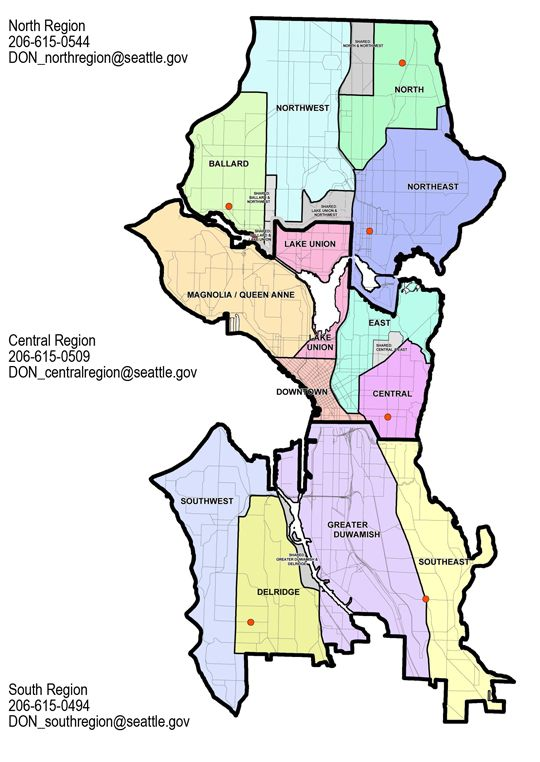

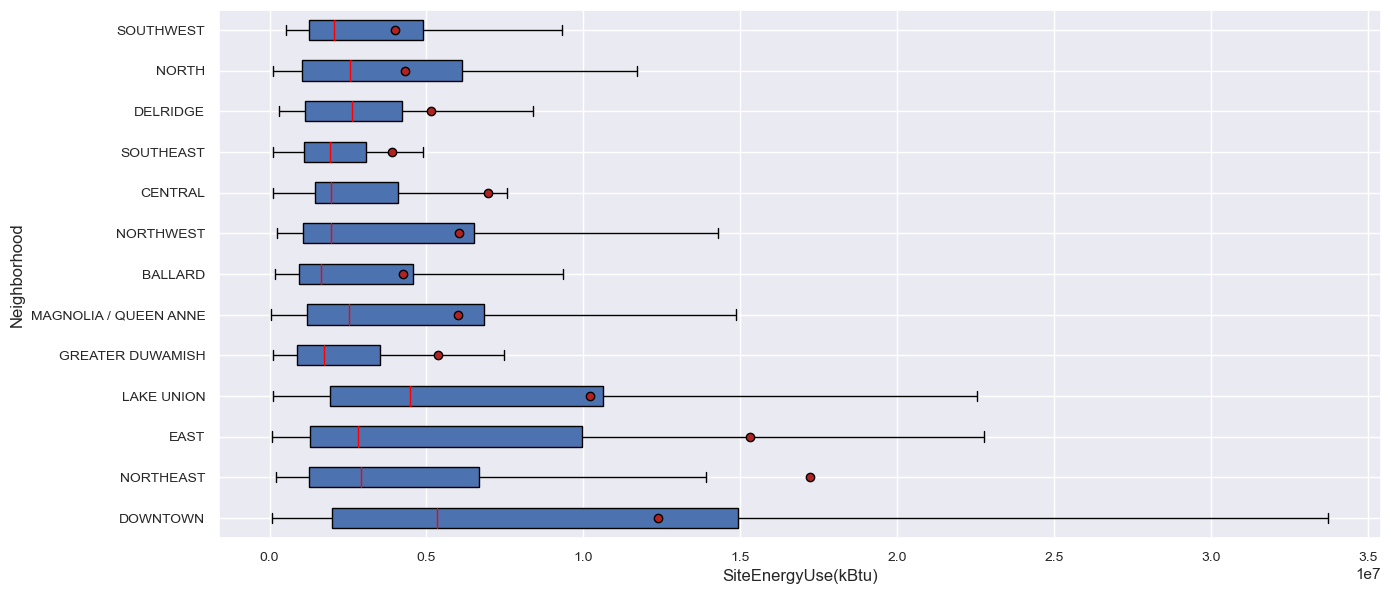

In [85]:
fig=plt.figure(figsize=[15,7],dpi=100)
groupes=[]

categories=['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHEAST', 'DELRIDGE', 'NORTH', 'SOUTHWEST']

for element in categories:
    groupes.append(data[data['Neighborhood']==element]['SiteEnergyUse(kBtu)'])
    
medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
ax=plt.boxplot(groupes, labels=categories, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
ax=plt.xticks(fontsize=10)
ax=plt.yticks(fontsize=10)
ax=plt.xlabel('{}'.format('SiteEnergyUse(kBtu)'), fontdict=None,fontsize=12)
ax=plt.ylabel('Neighborhood', fontdict=None,fontsize=12)

In [86]:
from pingouin import kruskal
print(kruskal(data=data,dv='SiteEnergyUse(kBtu)',between='Neighborhood'),'\n')

               Source  ddof1          H         p-unc
Kruskal  Neighborhood     12  147.33329  1.968948e-25 



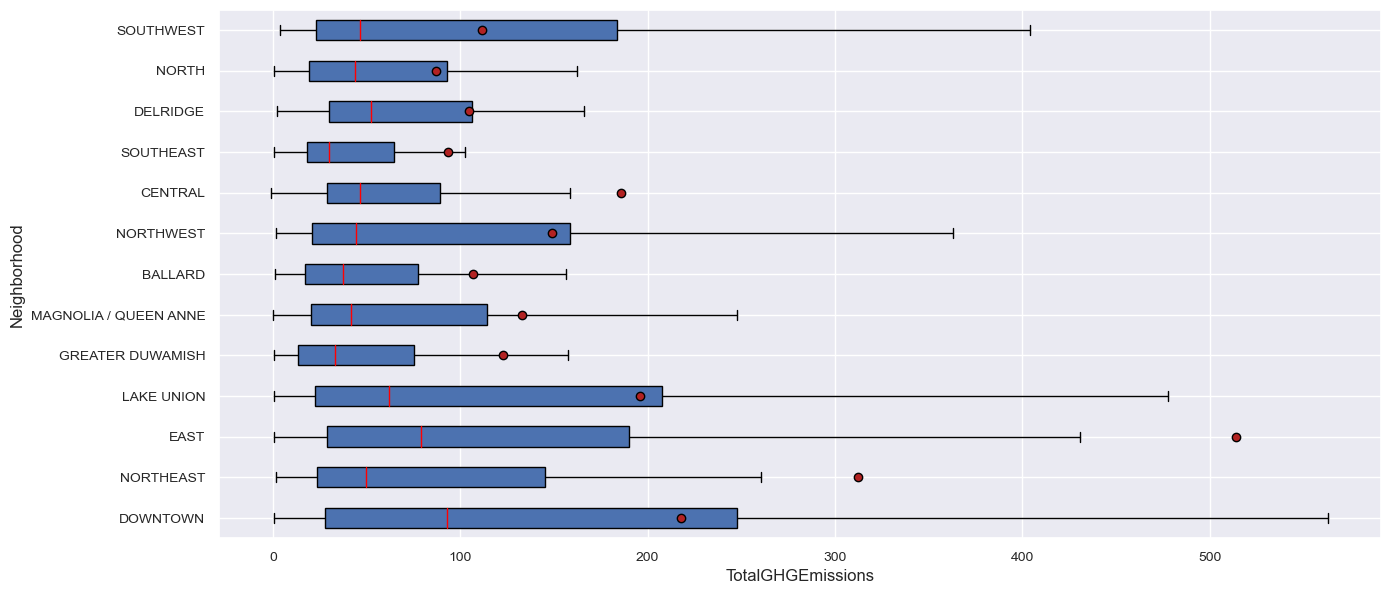

In [87]:
fig=plt.figure(figsize=[15,7],dpi=100)
groupes=[]

categories=['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHEAST', 'DELRIDGE', 'NORTH', 'SOUTHWEST']

for element in categories:
    groupes.append(data[data['Neighborhood']==element]['TotalGHGEmissions'])
    
medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
ax=plt.boxplot(groupes, labels=categories, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
ax=plt.xticks(fontsize=10)
ax=plt.yticks(fontsize=10)
ax=plt.xlabel('{}'.format('TotalGHGEmissions'), fontdict=None,fontsize=12)
ax=plt.ylabel('Neighborhood', fontdict=None,fontsize=12)

### 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' vs 'PrimaryPropertyType'  

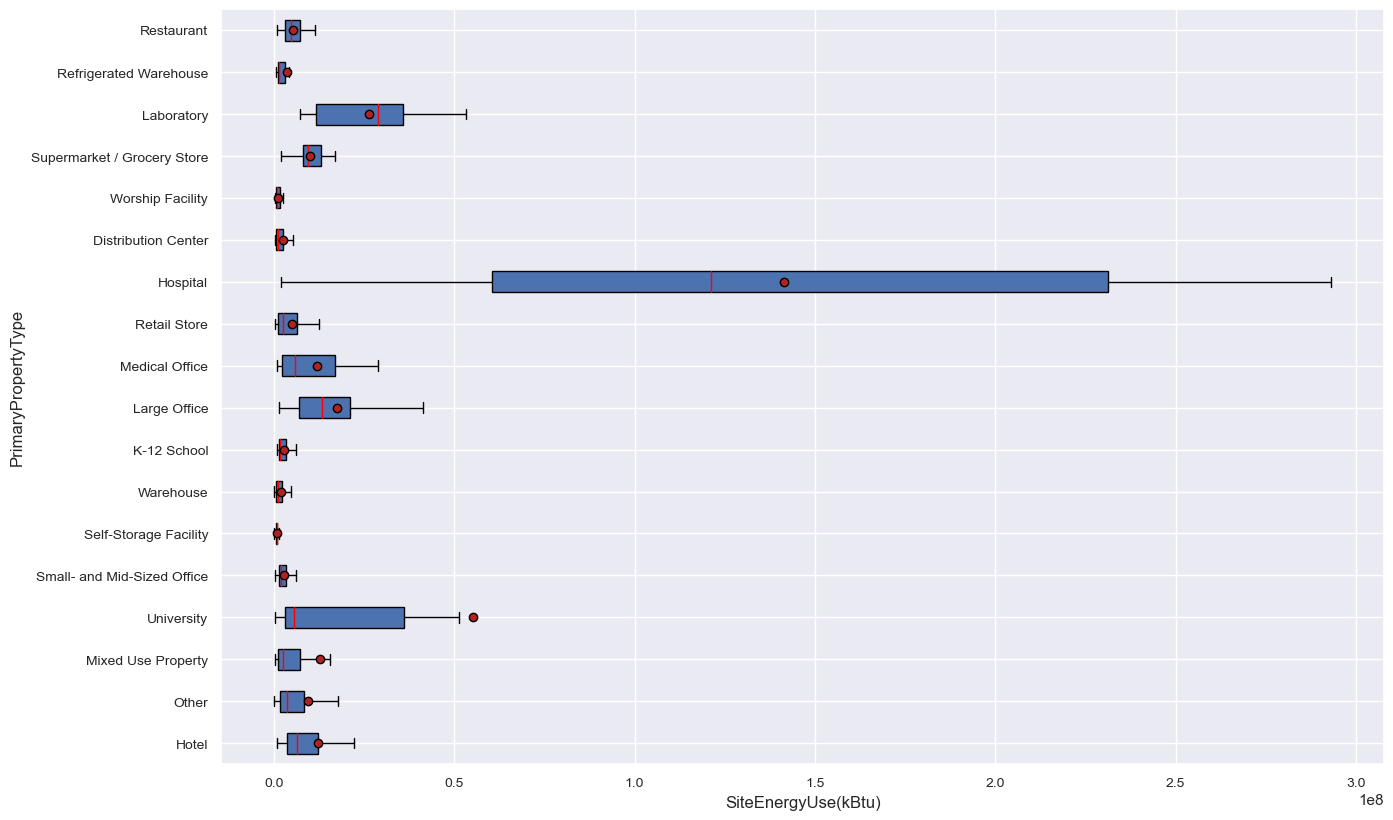

In [88]:
fig=plt.figure(figsize=[15,10],dpi=100)
groupes=[]

categories=data['PrimaryPropertyType'].unique()

for element in categories:
    groupes.append(data[data['PrimaryPropertyType']==element]['SiteEnergyUse(kBtu)'])
    
medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
ax=plt.boxplot(groupes, labels=categories, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
ax=plt.xticks(fontsize=10)
ax=plt.yticks(fontsize=10)
ax=plt.xlabel('{}'.format('SiteEnergyUse(kBtu)'), fontdict=None,fontsize=12)
ax=plt.ylabel('PrimaryPropertyType', fontdict=None,fontsize=12)

In [89]:
print(kruskal(data=data,dv='SiteEnergyUse(kBtu)',between='PrimaryPropertyType'),'\n')

                      Source  ddof1          H          p-unc
Kruskal  PrimaryPropertyType     17  634.78675  6.066669e-124 



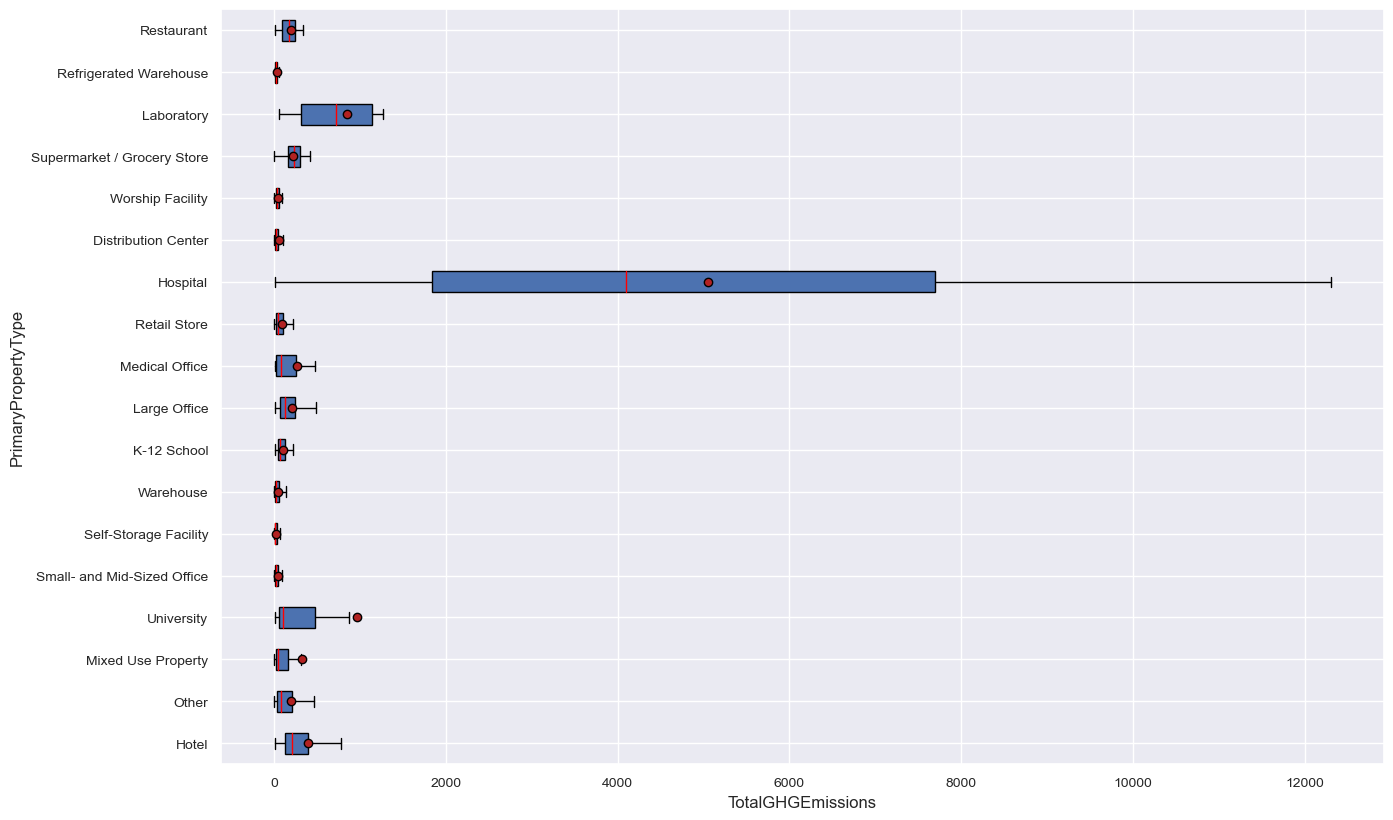

In [90]:
fig=plt.figure(figsize=[15,10],dpi=100)
categories=data['PrimaryPropertyType'].unique()
groupes=[]
for element in categories:
    groupes.append(data[data['PrimaryPropertyType']==element]['TotalGHGEmissions'])
    
medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
ax=plt.boxplot(groupes, labels=categories, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
ax=plt.xticks(fontsize=10)
ax=plt.yticks(fontsize=10)
ax=plt.xlabel('{}'.format('TotalGHGEmissions'), fontdict=None,fontsize=12)
ax=plt.ylabel('PrimaryPropertyType', fontdict=None,fontsize=12)

In [91]:
print(kruskal(data=data,dv='TotalGHGEmissions',between='PrimaryPropertyType'),'\n')

                      Source  ddof1         H         p-unc
Kruskal  PrimaryPropertyType     17  479.3877  4.132973e-91 



In [92]:
map=folium.Map([47.6,-122.3],width="%100",height="%100",zoom_start=10)
colors=['black','blue','red','brown','green','crimson']
labels=['Large Office','Hotel','Laboratory','Restaurant','Hospital','Supermarket / Grocery Store']
i=0
for var in labels:
    lat = list(data[data['PrimaryPropertyType']==var]['Latitude'])
    lon = list(data[data['PrimaryPropertyType']==var]['Longitude'])
    cons = list(data[data['PrimaryPropertyType']==var])

    for loc, p in zip(zip(lat, lon), cons):
        folium.Circle(
            location=loc,
            radius=10,
            fill=True,
            color=colors[i]
        ).add_to(map)
    #legend_name=var
    i+=1
map

### 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' vs 'AgeBuilt'

In [93]:
age_min=data['YearBuilt'].min()
age_max=data['YearBuilt'].max()
print(age_max)
graph('YearBuilt',age_min,age_max)

2015


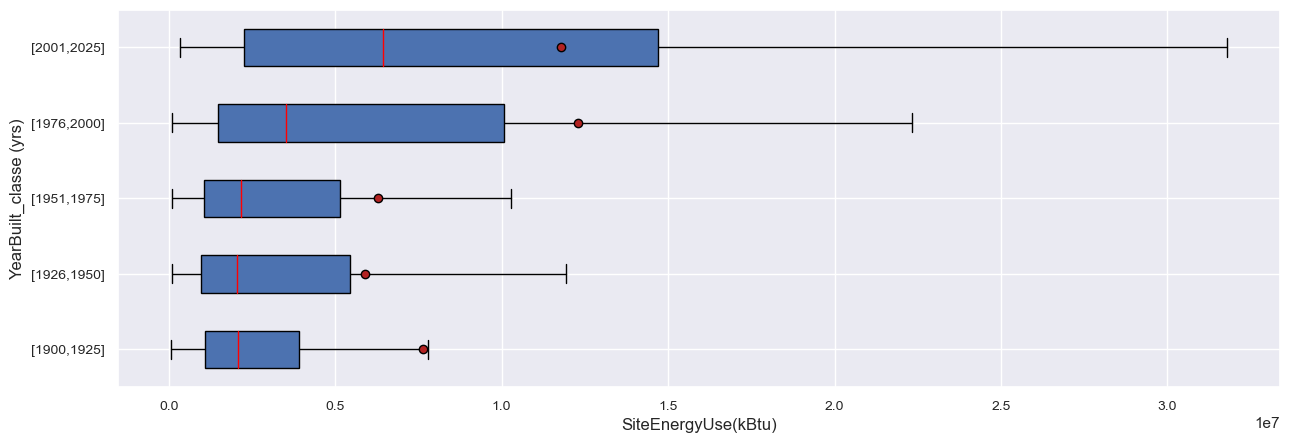

In [94]:
fig=plt.figure(figsize=[15,5],dpi=100)
groupes=[]
dict={range(1900, 1925):'[1900,1925]',range(1926, 1950):'[1926,1950]',range(1951, 1975):'[1951,1975]',range(1976, 2000):'[1976,2000]',range(2001, 2025):'[2001,2025]'}
data['YearBuilt_classe']=data['YearBuilt'].apply(lambda x: next((v for k, v in dict.items() if x in k),0))
categories=['[1900,1925]','[1926,1950]','[1951,1975]','[1976,2000]','[2001,2025]']

for element in categories:
    groupes.append(data[data['YearBuilt_classe']==element]['SiteEnergyUse(kBtu)'])
    
medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
ax=plt.boxplot(groupes, labels=categories, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
ax=plt.xticks(fontsize=10)
ax=plt.yticks(fontsize=10)
ax=plt.xlabel('{}'.format('SiteEnergyUse(kBtu)'), fontdict=None,fontsize=12)
ax=plt.ylabel('YearBuilt_classe (yrs)', fontdict=None,fontsize=12)

In [95]:
print(kruskal(data=data,dv='SiteEnergyUse(kBtu)',between='YearBuilt_classe'),'\n')

                   Source  ddof1           H         p-unc
Kruskal  YearBuilt_classe      5  111.471118  2.002403e-22 



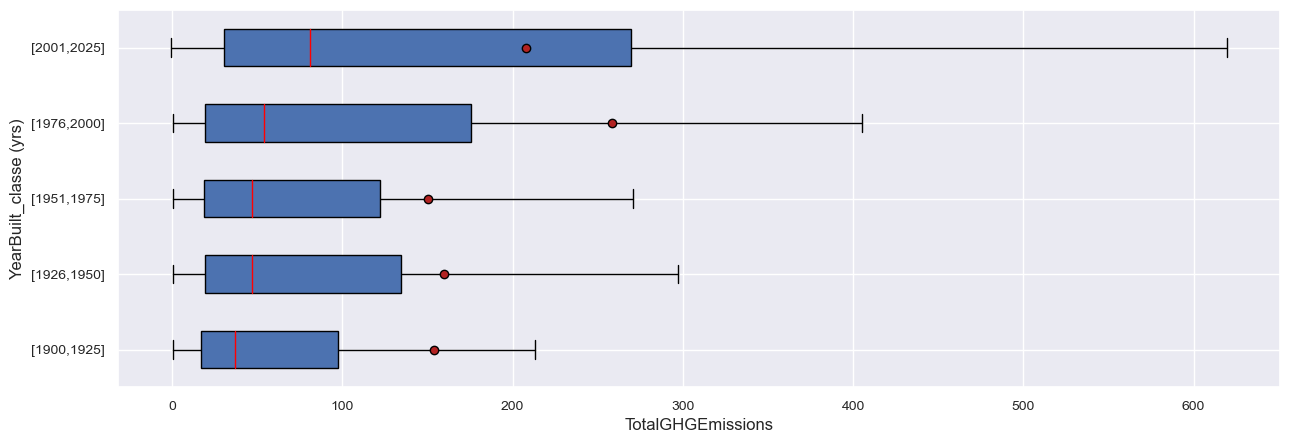

In [96]:
fig=plt.figure(figsize=[15,5],dpi=100)
groupes=[]
dict={range(1900, 1925):'[1900,1925]',range(1926, 1950):'[1926,1950]',range(1951, 1975):'[1951,1975]',range(1976, 2000):'[1976,2000]',range(2001, 2025):'[2001,2025]'}
data['YearBuilt_classe']=data['YearBuilt'].apply(lambda x: next((v for k, v in dict.items() if x in k),0))
categories=['[1900,1925]','[1926,1950]','[1951,1975]','[1976,2000]','[2001,2025]']

for element in categories:
    groupes.append(data[data['YearBuilt_classe']==element]['TotalGHGEmissions'])
    
medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
ax=plt.boxplot(groupes, labels=categories, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
ax=plt.xticks(fontsize=10)
ax=plt.yticks(fontsize=10)
ax=plt.xlabel('{}'.format('TotalGHGEmissions'), fontdict=None,fontsize=12)
ax=plt.ylabel('YearBuilt_classe (yrs)', fontdict=None,fontsize=12)

In [97]:
print(kruskal(data=data,dv='TotalGHGEmissions',between='YearBuilt_classe'),'\n')

                   Source  ddof1          H         p-unc
Kruskal  YearBuilt_classe      5  38.555066  2.918436e-07 



In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 3375
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1489 non-null   int64  
 1   BuildingType                     1489 non-null   object 
 2   PrimaryPropertyType              1489 non-null   object 
 3   Neighborhood                     1489 non-null   object 
 4   Latitude                         1489 non-null   float64
 5   Longitude                        1489 non-null   float64
 6   YearBuilt                        1489 non-null   int64  
 7   NumberofBuildings                1489 non-null   float64
 8   NumberofFloors                   1489 non-null   int64  
 9   PropertyGFATotal                 1489 non-null   int64  
 10  PropertyGFAParking               1489 non-null   int64  
 11  ListOfAllPropertyUseTypes        1489 non-null   object 
 12  LargestPropertyUseTy

# Feature engineering and pre-processing

## Variables 'PropertyUseTypeGFA'

In [99]:
data['LargestPropertyUseTypeGFA_rel']=data['LargestPropertyUseTypeGFA'].values/data['PropertyGFATotal'].values
data['SecondLargestPropertyUseTypeGFA_rel']=data['SecondLargestPropertyUseTypeGFA'].values/data['PropertyGFATotal'].values
data['ThirdLargestPropertyUseTypeGFA_rel']=data['ThirdLargestPropertyUseTypeGFA'].values/data['PropertyGFATotal'].values

## Variables 'PropertyGFA'

In [100]:
print("Skewness 'PropertyGFATotal' sur jeu de train avant log: {:.3f}".format(data['PropertyGFATotal'].skew()))
data['PropertyGFATotal_log']=np.log1p(data['PropertyGFATotal'])
print("Skewness 'PropertyGFATotal_log' sur jeu de train après log: {:.3f}".format(data['PropertyGFATotal_log'].skew()))
print("Skewness 'PropertyGFAParking' sur jeu de train avant log: {:.3f}".format(data['PropertyGFAParking'].skew()))
data['PropertyGFAParking_log']=np.log1p(data['PropertyGFAParking'])
print("Skewness 'PropertyGFAParking_log' sur jeu de train après log: {:.3f}".format(data['PropertyGFAParking_log'].skew()))

Skewness 'PropertyGFATotal' sur jeu de train avant log: 18.729
Skewness 'PropertyGFATotal_log' sur jeu de train après log: 1.088
Skewness 'PropertyGFAParking' sur jeu de train avant log: 4.988
Skewness 'PropertyGFAParking_log' sur jeu de train après log: 1.462


In [101]:
data.drop(columns=['PropertyGFATotal','PropertyGFAParking'],axis=1,inplace=True)

## Variables 'SteamUse(kBtu)', 'Electricity(kBtu)' et 'NaturalGas(kBtu)'

In [102]:
data['Electricity(kBtu)_bin']=data['Electricity(kBtu)']>0
data['Electricity(kBtu)_bin']=data['Electricity(kBtu)_bin'].astype('int64')
data.drop(['Electricity(kBtu)'],axis=1,inplace=True)
print("Variance 'Electricity(kBtu)_bin':",round(data['Electricity(kBtu)_bin'].var(),3))

Variance 'Electricity(kBtu)_bin': 0.002


In [103]:
data['NaturalGas(kBtu)_bin']=data['NaturalGas(kBtu)']>0
data['NaturalGas(kBtu)_bin']=data['NaturalGas(kBtu)_bin'].astype('int64')
data.drop(['NaturalGas(kBtu)'],axis=1,inplace=True)
print("Variance 'NaturalGas(kBtu)_bin':",round(data['NaturalGas(kBtu)_bin'].var(),3))

Variance 'NaturalGas(kBtu)_bin': 0.207


In [104]:
data['SteamUse(kBtu)_bin']=data['SteamUse(kBtu)']>0
data['SteamUse(kBtu)_bin']=data['SteamUse(kBtu)_bin'].astype('int64')
data.drop(['SteamUse(kBtu)'],axis=1,inplace=True)
print("Variance 'SteamUse(kBtu)_bin':",round(data['SteamUse(kBtu)_bin'].var(),3))

Variance 'SteamUse(kBtu)_bin': 0.069


In [105]:
data.drop(['Electricity(kBtu)_bin'],axis=1,inplace=True);

In [106]:
data.drop(columns=['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'],axis=1,inplace=True);

## Variable 'BuildingType'

In [107]:
data['BuildingType'].unique()

array(['NonResidential', 'Campus', 'SPS-District K-12'], dtype=object)

In [108]:
one_hot = pd.get_dummies(data['BuildingType'])
one_hot=one_hot.drop('SPS-District K-12',axis=1)
data = data.drop('BuildingType',axis = 1)
data = data.join(one_hot)

## Variable 'YearBuilt' et 'NumberofFloors'

In [109]:
currentYear = datetime.now().year

In [110]:
AgeBuilt_values=currentYear-data.YearBuilt.values

In [111]:
data['Age_Built']=AgeBuilt_values
data.drop('YearBuilt',axis=1,inplace=True)
data.drop('YearBuilt_classe',axis=1,inplace=True)

In [112]:
dict={range(0, 25):0,range(26, 50):1,range(51, 75):2,range(76, 100):3,range(101, 125):4}
data['AgeBuilt_classe']=data['Age_Built'].apply(lambda x: next((v for k, v in dict.items() if x in k),0))

In [113]:
data['NumberofFloors_classe']=data['NumberofFloors'].values
dict={range(0, 1):0,range(2, 3):1,range(4, 5):2,range(6, np.max(data['NumberofFloors'].values)):3}
data['NumberofFloors_classe']=data['NumberofFloors_classe'].apply(lambda x: next((v for k, v in dict.items() if x in k),0))
data.drop('NumberofFloors',axis=1,inplace=True)

In [114]:
#data.ListOfAllPropertyUseTypes.str.split(pat = ',')
data['TotalPropertyUseTypes']=data.ListOfAllPropertyUseTypes.str.split(pat = ',').apply(lambda x: len(x))
data.drop(['ListOfAllPropertyUseTypes'],axis=1,inplace=True)

In [115]:
data.drop(columns=['Neighborhood','Latitude','Longitude'],axis=1,inplace=True)

In [116]:
columns=['OSEBuildingID',
         'Campus',
         'NonResidential',
         'Age_Built',
         'AgeBuilt_classe',
         'NumberofBuildings',
         'NumberofFloors_classe',
         'PropertyGFATotal_log',
         'PropertyGFAParking_log',
         'TotalPropertyUseTypes',
         'PrimaryPropertyType',
         'LargestPropertyUseTypeGFA_rel',
         'SecondLargestPropertyUseTypeGFA_rel',
         'ThirdLargestPropertyUseTypeGFA_rel',
         'NaturalGas(kBtu)_bin',
         'SteamUse(kBtu)_bin',
         'ENERGYSTARScore',
         'ENERGYSTARScore_imputed',
         'SiteEnergyUse(kBtu)',
         'TotalGHGEmissions'
         ]
data=data[columns]
data.set_index('OSEBuildingID',inplace=True)

In [117]:
data.head()

Campus  NonResidential  Age_Built  AgeBuilt_classe  NumberofBuildings  NumberofFloors_classe  PropertyGFATotal_log  PropertyGFAParking_log  TotalPropertyUseTypes PrimaryPropertyType  LargestPropertyUseTypeGFA_rel  SecondLargestPropertyUseTypeGFA_rel  ThirdLargestPropertyUseTypeGFA_rel  NaturalGas(kBtu)_bin  SteamUse(kBtu)_bin  ENERGYSTARScore  ENERGYSTARScore_imputed  SiteEnergyUse(kBtu)  TotalGHGEmissions
OSEBuildingID                                                                                                                                                                                                                                                                                                                                                                                                                           
1                   0               1         95                3                1.0                      3             11.390023                0.000000                      1               Hotel                       1.000000                             0.000000                            0.000000                     1                   1             60.0                     60.0            7226362.5             249.98
2                   0               1         26                1                1.0                      3             11.547974                9.620129                      3               Hotel                       0.809918                             0.145453                            0.044629                     1                   0             61.0                     61.0            8387933.0             295.86
3                   0               1         53                2                1.0                      3             13.770629               12.189532                      1               Hotel                       0.791220                             0.000000                            0.000000                     1                   1             43.0                     43.0           72587024.0            2089.28
5                   0               1         96                3                1.0                      3             11.023878                0.000000                      1               Hotel                       1.000000                             0.000000                            0.000000                     1                   1             56.0                     56.0            6794584.0             286.43
8                   0               1         42                1                1.0                      3             12.075856               11.034906                      3               Hotel                       0.703070                             0.387339                            0.000000                     1                   0             75.0                     75.0           14172606.0             505.01

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 1 to 50226
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Campus                               1489 non-null   uint8  
 1   NonResidential                       1489 non-null   uint8  
 2   Age_Built                            1489 non-null   int64  
 3   AgeBuilt_classe                      1489 non-null   int64  
 4   NumberofBuildings                    1489 non-null   float64
 5   NumberofFloors_classe                1489 non-null   int64  
 6   PropertyGFATotal_log                 1489 non-null   float64
 7   PropertyGFAParking_log               1489 non-null   float64
 8   TotalPropertyUseTypes                1489 non-null   int64  
 9   PrimaryPropertyType                  1489 non-null   object 
 10  LargestPropertyUseTypeGFA_rel        1489 non-null   float64
 11  SecondLargestPropertyUseTypeG

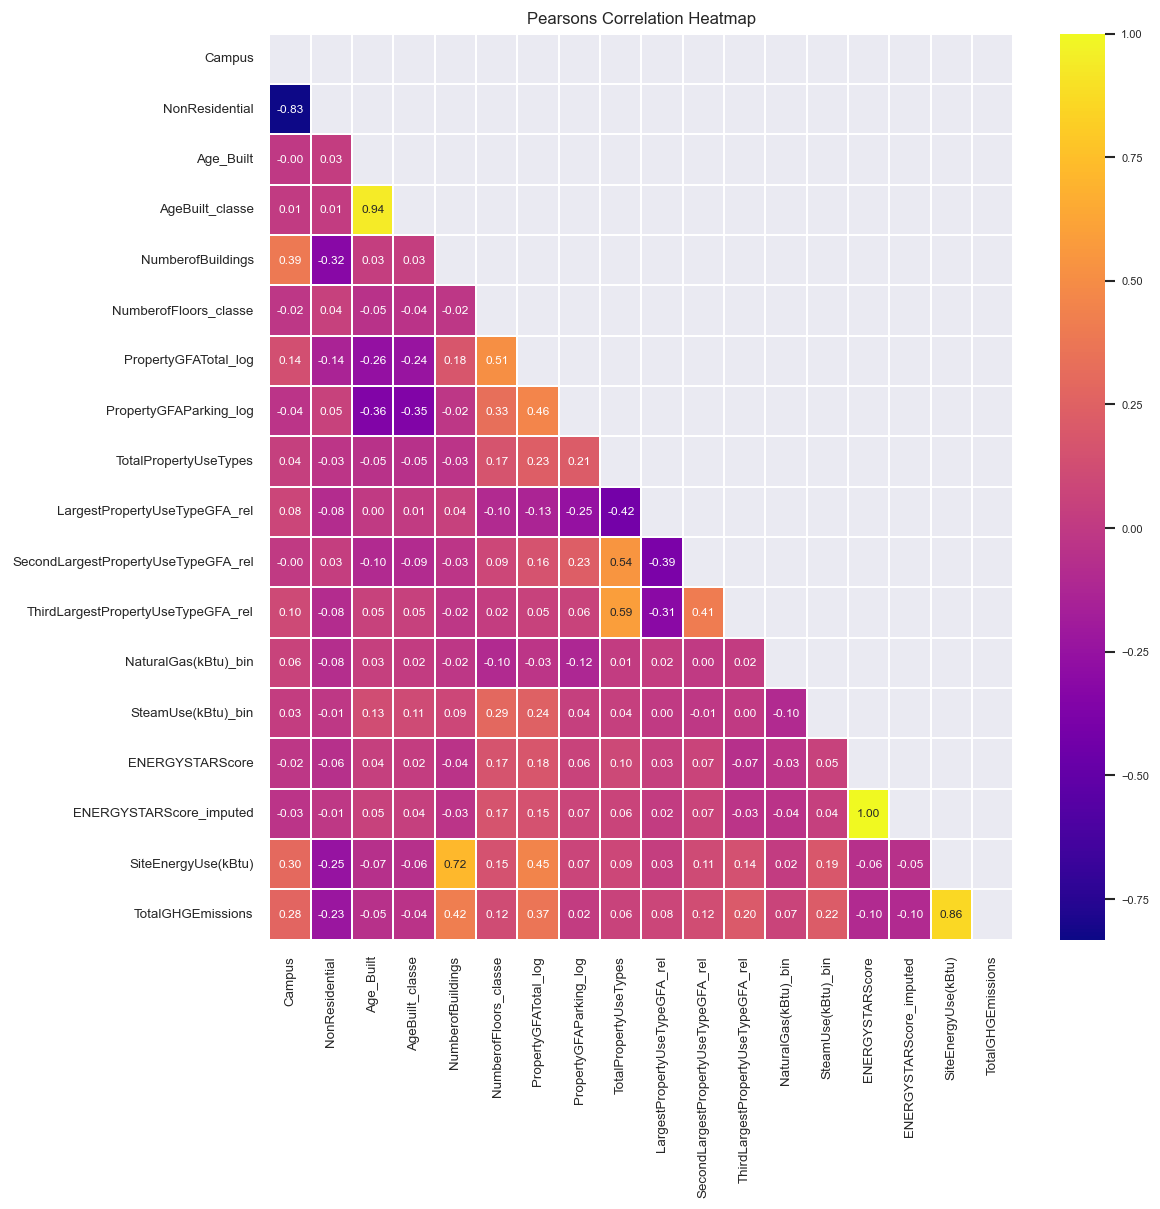

In [119]:
data_corr=data.drop(['PrimaryPropertyType'],axis=1)
sns.set(font_scale=0.6) 
sns.set_style('darkgrid')
plt.figure(dpi = 120,figsize= (10,10))
mask = np.triu(np.ones_like(data_corr.corr(),dtype = bool))
sns.heatmap(data_corr.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
sns.set(font_scale=0.6)
plt.yticks(rotation = 0,fontsize=8)
plt.xticks(rotation = 90,fontsize=8)
plt.title('Pearsons Correlation Heatmap',fontsize= 10)
plt.show()

In [120]:
data.to_csv("Data_cleaned_2016_Building_Energy_Benchmarking.csv")